# ACT vs SAT: The Battle of Standardized Tests

## Problem Statement

Where should the College Board spend it's marketing dollars to increase SAT participation rates?

## Executive Summary

The SAT (Scholastic Assessment Test) is a standardized test used for college admissions in the United States designed to test high school students' general educational development and readiness for college studies. It is owned and administered by the College Board. The ACTs (American College Testing) is a different standardized test used for college admissions, and is a competitor to the SAT. The two tests are similar in content but differ in format. The SAT is made up of two sections scored out of 800, while the ACT is made up of four sections scored out of 36. 

Both exams are nationally recognized in the U.S. and are common admission requirements to universities. In some states, it is mandatory for all high school students to take the ACTs or the SATs. Since universities accept scores from either the SAT or the ACT, students can decide which one they want to take or take both exams. 

Data was collected on participation rates and mean scores of the SATs and ACTs for the years 2017 and 2018 following certain structural and content changes commissioned to the exam in 2016. This study analyses the data at hand to make recommendations to College Board about which states money would be best spent in to improve SAT participation rates. A number of interesting discoveries are made regarding SAT/ACT participation rates across the U.S., the relationship of participation rates with mean scores, and the reasons behind why some states decide to make one exam over the other mandatory. 

Final recommendations to the College Board are as follows:
* Keep improving the SAT
* Focus marketing efforts in the East and West coast 
* Try to win states where ACT is mandatory by going directly to the policy makers


### Table of Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import re
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
alt.renderers.enable('notebook')
%config InlineBackend.figure_format = 'retina'

## 2017 Data Import and Cleaning

#### 1. Import  data

In [2]:
df_s = pd.read_csv('data/sat_2017.csv')
df_a = pd.read_csv('data/act_2017.csv')

#### 2. Display data

In [3]:
df_s.head(5)

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055

In [4]:
df_a.head(5)

State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0
1   Alabama          100%     18.9  18.4     19.7     19.4      19.2
2    Alaska           65%     18.7  19.8     20.4     19.9      19.8
3   Arizona           62%     18.6  19.8     20.1     19.8      19.7
4  Arkansas          100%     18.9  19.0     19.7     19.5      19.4

#### 3. Data description

The datasets provide information on the participation rates, mean score per sections and mean total score in the respective exams, per state, for the graduating class of 2017. 

#### 4a. Data completeness

In [5]:
df_s.isna().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [6]:
df_a.isna().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

There are no NaN values in any columns in any of the dataframes.

#### 4b. Data quality

Since the ACT score can range from a minimum of 1 and a maximum of 36, and the SAT from a minimum of 400 and a maximum of 800, let's check if there are any scores outside these boundaries.

In [7]:
# sat-2017

print([index for index, score in enumerate(list(df_s['Evidence-Based Reading and Writing'])) if score < 400 or score > 800])
print([index for index, score in enumerate(list(df_s['Math'])) if score < 400 or score > 800])

[]
[20]


In [8]:
df_s.iloc[[20]]

State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060

52 is not a possible score. 1060-536 gives 524 so that must be the actual score. Let's fix this value.

In [9]:
df_s.iloc[20,3] = 524

In [10]:
# act-2017

print([index for index, score in enumerate(list(df_a.English)) if score < 1 or score > 36])
print([index for index, score in enumerate(list(df_a.Math)) if score < 1 or score > 36])
print([index for index, score in enumerate(list(df_a.Reading)) if score < 1 or score > 36])
print([index for index, score in enumerate(list(df_a.Science)) if score < 1 or score > 36])

[]
[]
[]
[]


The composite and total scores for each exam should be an average of the other scores. Let's check now whether that is actually the case.

In [11]:
# create new column that sums up sections in each df

df_s['sum_sections'] = df_s['Evidence-Based Reading and Writing'] + df_s['Math']
df_a['sum_sections'] = (df_a['English'] + df_a['Math'] + df_a['Reading'] + df_a['Science'])/4

In [12]:
df_s[df_s['sum_sections'] != df_s['Total']]

State Participation  Evidence-Based Reading and Writing  Math  \
6     Connecticut          100%                                 530   512   
7        Delaware          100%                                 503   492   
12          Idaho           93%                                 513   493   
15           Iowa            2%                                 641   635   
18      Louisiana            4%                                 611   586   
21  Massachusetts           76%                                 555   551   
22       Michigan          100%                                 509   495   
24    Mississippi            2%                                 634   607   
27       Nebraska            3%                                 629   625   
32       New York           67%                                 528   523   
35           Ohio           12%                                 578   570   
39   Rhode Island           71%                                 539   524   
41   South Dakota            3%                                 612   603   
42      Tennessee            5%                                 623   604   
45        Vermont           60%                                 562   551   

    Total  sum_sections  
6    1041          1042  
7     996           995  
12   1005          1006  
15   1275          1276  
18   1198          1197  
21   1107          1106  
22   1005          1004  
24   1242          1241  
27   1253          1254  
32   1052          1051  
35   1149          1148  
39   1062          1063  
41   1216          1215  
42   1228          1227  
45   1114          1113

These numbers are off by one unit which isn't a problem. The scores were most probably rounded up or down depending on whether the first digit after the decimal point was above or below .5. Next, instead of looking at the numbers manually, let's create a loop to check whether the composite score for the ACT is greater or smaller than the calculated sum of sections by more than one unit. 

In [13]:
suspicious = []

sum_sections = df_a['sum_sections'].tolist()

# the composite scores column has the wrong datatype, but we'll tackle this later
# for now, we'll coerce the conversion for the purposes of this exercise
official_scores = df_a.Composite.apply(lambda x: pd.to_numeric(x, errors='coerce')).tolist() 

for sum_section, official_score in zip(sum_sections, official_scores):
    if official_score > sum_section+1 or official_score < sum_section-1:
            suspicious.append((official_score, sum_section))

In [14]:
suspicious

[(23.6, 18.225)]

In [15]:
df_a[(df_a.Composite == '23.6') & (df_a.sum_sections == 18.225)]

State Participation  English  Math  Reading  Science Composite  \
21  Maryland           28%     23.3  23.1     24.2      2.3      23.6   

    sum_sections  
21        18.225

In [16]:
# There is something fishy here, the science score is too low
# There is likely a data entry error
# We can find the real science score through some basic algebra
# Since the composite score is an average of the four sections

real_science_score = 23.6*4-23.3-23.1-24.2 
real_science_score

23.800000000000008

In [17]:
# Actual science score should be 23.8 

df_a.at[21, 'Science'] = 23.8

In [18]:
# No longer need the sum_sections columns, so drop them

df_a.drop(['sum_sections'], axis=1, inplace=True)
df_s.drop(['sum_sections'], axis=1, inplace=True)

#### 5. Data types

In [19]:
df_s.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [20]:
df_a.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

Participation column in each df should be an integer as we may do some arithmetic operations with it. The composite column in df_a should be a float.

#### 6. Fix incorrect data types

In [21]:
# create a function to convert a column from string to int

def type_converter(df, col):
    for i, row in df.iterrows():
        new_value = df.iloc[i][col][:-1] #drop the % at the end
        df.at[i, col] = new_value

    df[col] = df[col].apply(int)
    df[col] = df[col] / 100

In [22]:
type_converter(df_s, 'Participation')
type_converter(df_a, 'Participation')

In [23]:
df_s.head(5)

State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama           0.05                                 593   572   1165
1      Alaska           0.38                                 547   533   1080
2     Arizona           0.30                                 563   553   1116
3    Arkansas           0.03                                 614   594   1208
4  California           0.53                                 531   524   1055

In [24]:
df_a.head(5)

State  Participation  English  Math  Reading  Science Composite
0  National           0.60     20.3  20.7     21.4     21.0      21.0
1   Alabama           1.00     18.9  18.4     19.7     19.4      19.2
2    Alaska           0.65     18.7  19.8     20.4     19.9      19.8
3   Arizona           0.62     18.6  19.8     20.1     19.8      19.7
4  Arkansas           1.00     18.9  19.0     19.7     19.5      19.4

In [25]:
df_a.tail()

State  Participation  English  Math  Reading  Science Composite
47       Virginia           0.29     23.5  23.3     24.6     23.5      23.8
48     Washington           0.29     20.9  21.9     22.1     22.0      21.9
49  West Virginia           0.69     20.0  19.4     21.2     20.5      20.4
50      Wisconsin           1.00     19.7  20.4     20.6     20.9      20.5
51        Wyoming           1.00     19.4  19.8     20.8     20.6     20.2x

In [26]:
# there is an error in row 51 of df_a which was discovered previously 
# while trying to convert the column type to float
# we need to remove the x at the end to convert the type of the column

df_a.at[51,'Composite'] = '20.2'

In [27]:
df_a['Composite'] = df_a['Composite'].apply(float)

In [28]:
df_s.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [29]:
df_a.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Column names

In [30]:
# we need to fix column names to make referencing them easier
# shorten the column Evidence-Based Reading and Writing in df_s 
# it's too long and impractical to type out every time we need to reference it

df_s = df_s.rename(columns={'Evidence-Based Reading and Writing': 'EBRW'})

In [31]:
# change column names to lowercase 
# add exam type at the end of column name so its clear which column belongs to what exam

df_s.columns = df_s.columns.str.lower() + '_sat'
df_a.columns = df_a.columns.str.lower() + '_act'

In [32]:
# remove exam types from state as we'll merge the dfs later

df_s = df_s.rename(columns={'state_sat':'state'})
df_a = df_a.rename(columns={'state_act':'state'})

In [33]:
df_s.head()

state  participation_sat  ebrw_sat  math_sat  total_sat
0     Alabama               0.05       593       572       1165
1      Alaska               0.38       547       533       1080
2     Arizona               0.30       563       553       1116
3    Arkansas               0.03       614       594       1208
4  California               0.53       531       524       1055

In [34]:
df_a.head()

state  participation_act  english_act  math_act  reading_act  \
0  National               0.60         20.3      20.7         21.4   
1   Alabama               1.00         18.9      18.4         19.7   
2    Alaska               0.65         18.7      19.8         20.4   
3   Arizona               0.62         18.6      19.8         20.1   
4  Arkansas               1.00         18.9      19.0         19.7   

   science_act  composite_act  
0         21.0           21.0  
1         19.4           19.2  
2         19.9           19.8  
3         19.8           19.7  
4         19.5           19.4

#### 8. Data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|------------|
|**state**|*object*|2017 SAT|The state in which SAT takers reside| 
|**participation_sat**|*float*|2017 SAT|The percent of students who took the exam from amongst those eligible| 
|**ebrw_sat**|*integer*|2017 SAT|Mean score received from the Evidence Based Reading and Writing section| 
|**math_sat**|*integer*|2017 SAT|Mean score received from the Math section| 
|**total_sat**|*integer*|2017 SAT|Mean cumulative score received| 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|2017 ACT|The state in which ACT takers reside| 
|**participation_act**|*float*|2017 ACT|The percent of students who took the exam from amongst those eligible| 
|**english_act**|*float*|2017 ACT|Mean score received from the English section| 
|**math_act**|*float*|2017 ACT|Mean score received from the Math section|
|**reading_act**|*float*|2017 ACT|Mean score received from the Reading section| 
|**science_act**|*float*|2017 ACT|Mean score received from the Science section| 
|**composite_act**|*float*|2017 ACT|Mean cumulative score received| 

#### 9. Unmatching rows

In [35]:
#investigate whether the two dfs have the exact same states as columns

print(df_s.shape)
print(df_a.shape)

(51, 5)
(52, 7)


In [36]:
# find out which state doesn't match between the state

[state for state in list(df_a['state']) if state not in list(df_s['state'])]

['National']

In [37]:
df_a[df_a['state'] == 'National'].index

Int64Index([0], dtype='int64')

In [38]:
# drop this row since it's not interesting for the analysis at hand

df_a.drop(0,axis=0,inplace=True)

In [39]:
# confirm operation

df_a.shape

(51, 7)

#### 10. Merge dataframes and save clean data

In [40]:
df = df_s.merge(df_a, on = 'state')

In [41]:
df.to_csv('data/combined_2017.csv')

## 2018 Data Import and Cleaning

#### 1. Import  data

In [42]:
df_s2 = pd.read_csv('data/sat_2018.csv', delim_whitespace=True)
df_a2 = pd.read_csv('data/act_2018.csv')

#### 2. Display data

In [43]:
df_s2.head()

State ParticipationRate  EBRW  Math  Total
0     Alabama                6%   595   571   1166
1      Alaska               43%   562   544   1106
2     Arizona               29%   577   572   1149
3    Arkansas                5%   592   576   1169
4  California               60%   540   536   1076

In [44]:
df_a2.head()

state  participation  composite
0     Alabama            100       19.1
1      Alaska             33       20.8
2     Arizona             66       19.2
3    Arkansas            100       19.4
4  California             27       22.7

#### 3. Data description

The datasets provide information on the participation rate and the mean scores in the respective exams, per state for the year 2018. The SAT dataset includes information on mean scores per section, while the ACT dataset only includes the composite mean score.

#### 4a. Data completeness

In [45]:
# check for nulls

df_s2.isna().sum()

State                0
ParticipationRate    0
EBRW                 0
Math                 0
Total                0
dtype: int64

In [46]:
df_a2.isna().sum()

state            0
participation    0
composite        0
dtype: int64

We don't have any null values to deal with.

#### 4b. Data quality

In [47]:
# see if there are any scores outside the range of possible values, as was done previously
# sat-2018

print([index for index, score in enumerate(list(df_s2['EBRW'])) if score < 400 or score > 800])
print([index for index, score in enumerate(list(df_s2['Math'])) if score < 400 or score > 800])

[]
[]


In [48]:
# act-2018

print([index for index, score in enumerate(list(df_a2.composite)) if score < 1 or score > 36])

[]


In [49]:
# check if the total of section scores for the sat equal the sum of individual sections
# can't check for act since we don't have data on individual sections

df_s2['sum_sections'] = df_s2['EBRW'] + df_s2['Math']

In [50]:
suspicious2 = []

for sum_section, official_score in zip(df_s2['sum_sections'].tolist(), df_s2['Total'].tolist()):
    if official_score > sum_section+1 or official_score < sum_section-1:
            suspicious2.append((official_score, sum_section))
            
suspicious2

[(1229, 1198), (1257, 1268)]

In [51]:
df_s2[(df_s2.Total == 1229) | (df_s2.Total == 1257)]

State ParticipationRate  EBRW  Math  Total  sum_sections
26  Montana               10%   606   592   1229          1198
50  Wyoming                3%   633   635   1257          1268

In [52]:
# fix these values

df_s2.at[26, 'Total'] = 1198
df_s2.at[50,'Total'] = 1268

In [53]:
df_s2.drop('sum_sections', axis=1, inplace=True)

#### 5. Data types

In [54]:
df_s2.dtypes

State                object
ParticipationRate    object
EBRW                  int64
Math                  int64
Total                 int64
dtype: object

In [55]:
df_a2.dtypes

state             object
participation      int64
composite        float64
dtype: object

As was the case in the 2017 dataset, the participation rate column for SAT scores is of type object, when it should be a float. The participation rate column for ACT scores is correct.

#### 6. Fix incorrect data types

In [56]:
# use the function created in the previous section

type_converter(df_s2, 'ParticipationRate')

In [57]:
# confirm that operation worked correctly

df_s2.dtypes

State                 object
ParticipationRate    float64
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [58]:
df_s2[['ParticipationRate']].head(2)

ParticipationRate
0               0.06
1               0.43

In [59]:
df_a2[['participation']].head(2)

participation
0            100
1             33

In [60]:
# though the data type is correct, we should convert the participation column in 
# the act 2018 dataset to decimal so it's consistent with other dataframes

df_a2['participation'] = df_a2['participation'] / 100

In [61]:
df_a2[['participation']].head(2)

participation
0           1.00
1           0.33

#### 7. Column names

In [62]:
# we need to fix column names to make analysis easier later on
# rename df_s2 ParticipationRate column so its consistent with the other dataframes

df_s2 = df_s2.rename(columns={'ParticipationRate': 'Participation'})

In [63]:
# change column names to lowercase to make referencing them easier 
# add exam type at the end of column name so its clear which column belongs to what exam
# act is already lower case

df_s2.columns = df_s2.columns.str.lower() + '_sat'
df_a2.columns = df_a2.columns + '_act'

# remove exam types from state in the sat df 

df_s2 = df_s2.rename(columns={'state_sat':'state'})
df_a2 = df_a2.rename(columns={'state_act':'state'})

In [64]:
print(df_s2.columns)
print(df_a2.columns)

Index(['state', 'participation_sat', 'ebrw_sat', 'math_sat', 'total_sat'], dtype='object')
Index(['state', 'participation_act', 'composite_act'], dtype='object')


#### 8. Data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|------------|
|**state**|*object*|2018 SAT|The state that in which SAT takers reside| 
|**participation_sat**|*float*|2018 SAT|The percent of students who took the exam from amongst those eligible| 
|**ebrw_sat**|*integer*|2018 SAT|Mean score received from the Evidence Based Reading and Writing section| 
|**math_sat**|*integer*|2018 SAT|Mean score received from the Math section| 
|**total_sat**|*integer*|2018 SAT|Mean cumulative score received| 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|2018 ACT|The state that in which ACT takers reside| 
|**participation_act**|*float*|2018 ACT|The percent of students who took the exam from amongst those eligible| 
|**composite_act**|*float*|2018 ACT|Mean cumulative score received| 

#### 9. Unmatching rows

In [65]:
print(df_s2.shape)
print(df_a2.shape)

(51, 5)
(51, 3)


In [66]:
# check if all the state names are the same in the 2018 datasets

[state for state in list(df_a2['state']) if state not in list(df_s2['state'])]

[]

In [67]:
# check if the state names in the 2018 datasets are the same as in the combined 2017 dataset

states = {state2018:state2017 for state2018, state2017 in zip(list(df_a2['state']), list(df['state'])) if state2018 != state2017}
print(states)

{'DistrictOfColumbia': 'District of Columbia', 'NewHampshire': 'New Hampshire', 'NewJersey': 'New Jersey', 'NewMexico': 'New Mexico', 'NewYork': 'New York', 'NorthCarolina': 'North Carolina', 'NorthDakota': 'North Dakota', 'RhodeIsland': 'Rhode Island', 'SouthCarolina': 'South Carolina', 'SouthDakota': 'South Dakota', 'WestVirginia': 'West Virginia'}


In [68]:
states.keys()

dict_keys(['DistrictOfColumbia', 'NewHampshire', 'NewJersey', 'NewMexico', 'NewYork', 'NorthCarolina', 'NorthDakota', 'RhodeIsland', 'SouthCarolina', 'SouthDakota', 'WestVirginia'])

In [69]:
# fix the 2018 names in both dfs

def state_changer(df, col):
    for i, row in enumerate(list(df.state)):
        if row in states.keys():
            df.at[i, col] = states[row]

In [70]:
state_changer(df_s2, 'state')
state_changer(df_a2, 'state')

In [71]:
# check if the operation worked correctly

{sat_18:combined_17 for sat_18, combined_17 in zip(list(df_s2['state']), list(df['state'])) if sat_18 != combined_17}

{}

In [72]:
{act_18:combined_17 for act_18, combined_17 in zip(list(df_a2['state']), list(df['state'])) if act_18 != combined_17}

{}

#### 10. Combine the 2017 and 2018 data into a single dataframe

In [73]:
df_2018 = df_s2.merge(df_a2, on='state')

In [74]:
df_2018['year'] = '2018'

In [75]:
df['year'] = '2017'

In [76]:
df_2018.head()

state  participation_sat  ebrw_sat  math_sat  total_sat  \
0     Alabama               0.06       595       571       1166   
1      Alaska               0.43       562       544       1106   
2     Arizona               0.29       577       572       1149   
3    Arkansas               0.05       592       576       1169   
4  California               0.60       540       536       1076   

   participation_act  composite_act  year  
0               1.00           19.1  2018  
1               0.33           20.8  2018  
2               0.66           19.2  2018  
3               1.00           19.4  2018  
4               0.27           22.7  2018

In [77]:
df = pd.concat([df_2018, df], sort='False').sort_values(by='state')

In [78]:
df.to_csv('data/final.csv')

## Exploratory Data Analysis


#### Summary Statistics

In [79]:
d_17 = df[df.year == '2017'].describe().T
d_17

count         mean        std     min      25%      50%  \
composite_act       51.0    21.519608   2.020695   17.80    19.80    21.40   
ebrw_sat            51.0   569.117647  45.666901  482.00   533.50   559.00   
english_act         51.0    20.931373   2.353677   16.30    19.00    20.70   
math_act            51.0    21.182353   1.981989   18.00    19.40    20.90   
math_sat            51.0   556.882353  47.121395  468.00   523.50   548.00   
participation_act   51.0     0.652549   0.321408    0.08     0.31     0.69   
participation_sat   51.0     0.398039   0.352766    0.02     0.04     0.38   
reading_act         51.0    22.013725   2.067271   18.10    20.45    21.80   
science_act         51.0    21.462745   1.753392   18.20    19.95    21.30   
total_sat           51.0  1126.098039  92.494812  950.00  1055.50  1107.00   

                       75%     max  
composite_act        23.60    25.5  
ebrw_sat            613.00   644.0  
english_act          23.30    25.5  
math_act             23.10    25.3  
math_sat            599.00   651.0  
participation_act     1.00     1.0  
participation_sat     0.66     1.0  
reading_act          24.15    26.0  
science_act          23.20    24.9  
total_sat          1212.00  1295.0

ACT had way higher participation rates than the SAT during 2017.

In [80]:
d_18 = df[df.year == '2018'].describe().T
d_18

count         mean        std     min       25%      50%  \
composite_act       51.0    21.478431   2.141991   17.70    19.950    21.30   
ebrw_sat            51.0   567.294118  45.317676  497.00   535.000   552.00   
english_act          0.0          NaN        NaN     NaN       NaN      NaN   
math_act             0.0          NaN        NaN     NaN       NaN      NaN   
math_sat            51.0   557.470588  49.213963  480.00   521.500   547.00   
participation_act   51.0     0.616471   0.340810    0.07     0.285     0.66   
participation_sat   51.0     0.466275   0.380142    0.02     0.045     0.52   
reading_act          0.0          NaN        NaN     NaN       NaN      NaN   
science_act          0.0          NaN        NaN     NaN       NaN      NaN   
total_sat           51.0  1124.901961  94.181581  977.00  1062.500  1099.00   

                        75%     max  
composite_act        23.650    25.6  
ebrw_sat            616.500   643.0  
english_act             NaN     NaN  
math_act                NaN     NaN  
math_sat            600.500   655.0  
participation_act     1.000     1.0  
participation_sat     0.795     1.0  
reading_act             NaN     NaN  
science_act             NaN     NaN  
total_sat          1220.000  1298.0

Again, ACT had higher participation rates than the SAT in 2018 but we can see that the gap between the two was not as high as previous year. 

In [81]:
# write a function to manually calculate the standard deviation of each column

def std_calculator(df, col, year):
    filtered_df = df[df['year'] == year]
    n = len(filtered_df[col])
    mean = filtered_df[col].mean()
    diff_from_mean = []
    for row in list(filtered_df[col]):
        diff_from_mean.append((row - mean)**2)
    variance = sum(diff_from_mean)/(n-1)
    return round(math.sqrt(variance), 10)

In [82]:
# get std of each numeric column in a dictionary where keys are column names, values are stds

numeric_columns = list(df.columns)
numeric_columns.remove('year')
numeric_columns.remove('state')

In [83]:
sd_18 = {col:round(std_calculator(df, col, '2018'),5) for col in numeric_columns}

In [84]:
sd_17 = {col:round(std_calculator(df, col, '2017'),5) for col in numeric_columns}

In [85]:
# check if values match the values provided by the describe function

for k, v in {col:round(d_18.loc[col,'std'],5) for col in numeric_columns}.items():
    if v == sd_18[k]:
        print(True)

True
True
True
True
True
True


In [86]:
for k, v in {col:round(d_17.loc[col,'std'],5) for col in numeric_columns}.items():
    if v == sd_17[k]:
        print(True)

True
True
True
True
True
True
True
True
True
True


#### Investigate trends in the data

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [87]:
# filter relevant columns in the df

s17 = df[df['year'] == '2017'][['state', 'participation_sat', 'participation_act']]

In [88]:
# highest and lowest for 2017

# sat

min_1 = s17['participation_sat'].min()

s17[s17['participation_sat'] == min_1].iloc[:,:-1]

state  participation_sat
15          Iowa               0.02
24   Mississippi               0.02
34  North Dakota               0.02

In [89]:
max_1 = s17['participation_sat'].max()

s17[s17['participation_sat'] == max_1].iloc[:,:-1]

state  participation_sat
6            Connecticut                1.0
7               Delaware                1.0
8   District of Columbia                1.0
22              Michigan                1.0

In [90]:
# act

min_2 = s17['participation_act'].min()

s17[s17['participation_act'] == min_2].iloc[:,[0,2]]

state  participation_act
19  Maine               0.08

In [91]:
max_2 = s17['participation_act'].max()

s17[s17['participation_act'] == max_1].iloc[:,[0,2]]

state  participation_act
0          Alabama                1.0
3         Arkansas                1.0
5         Colorado                1.0
17        Kentucky                1.0
18       Louisiana                1.0
23       Minnesota                1.0
24     Mississippi                1.0
25        Missouri                1.0
26         Montana                1.0
28          Nevada                1.0
33  North Carolina                1.0
36        Oklahoma                1.0
40  South Carolina                1.0
42       Tennessee                1.0
44            Utah                1.0
49       Wisconsin                1.0
50         Wyoming                1.0

The ACT is required in a lot of states.

In [92]:
# filter relevant columns in the df

s18 = df[df['year'] == '2018'][['state', 'participation_sat', 'participation_act']]

In [93]:
# highest and lowest for 2018

# sat

min_3 = s18['participation_sat'].min()

s18[s18['participation_sat'] == min_3].iloc[:,:-1]

state  participation_sat
34  North Dakota               0.02

In [94]:
max_3 = s18['participation_sat'].max()

s18[s18['participation_sat'] == max_3].iloc[:,:-1]

state  participation_sat
5      Colorado                1.0
6   Connecticut                1.0
7      Delaware                1.0
12        Idaho                1.0
22     Michigan                1.0

In [95]:
# act

min_4 = s18['participation_act'].min()

s18[s18['participation_act'] == min_4].iloc[:,[0,2]]

state  participation_act
19  Maine               0.07

In [96]:
max_4 = s18['participation_act'].max()

s18[s18['participation_act'] == max_4].iloc[:,[0,2]]

state  participation_act
0          Alabama                1.0
3         Arkansas                1.0
17        Kentucky                1.0
18       Louisiana                1.0
24     Mississippi                1.0
25        Missouri                1.0
26         Montana                1.0
27        Nebraska                1.0
28          Nevada                1.0
33  North Carolina                1.0
35            Ohio                1.0
36        Oklahoma                1.0
40  South Carolina                1.0
42       Tennessee                1.0
44            Utah                1.0
49       Wisconsin                1.0
50         Wyoming                1.0

- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

In [97]:
# filter relevant columns in the df

m17 = df[df['year']=='2017'][['state','total_sat','composite_act']]

In [98]:
# highest and lowest for 2017

# sat

min_1 = m17['total_sat'].min()

m17[m17['total_sat'] == min_1].iloc[:,:-1]

state  total_sat
8  District of Columbia        950

In [99]:
max_1 = m17['total_sat'].max()

m17[m17['total_sat'] == max_1].iloc[:,:-1]

state  total_sat
23  Minnesota       1295

In [100]:
# act

min_2 = m17['composite_act'].min()

m17[m17['composite_act'] == min_2].iloc[:,[0,2]]

state  composite_act
28  Nevada           17.8

In [101]:
max_2 = m17['composite_act'].max()

m17[m17['composite_act'] == max_2].iloc[:,[0,2]]

state  composite_act
29  New Hampshire           25.5

In [102]:
m18 = df[df['year']=='2018'][['state','total_sat','composite_act']]

In [103]:
# highest and lowest for 2018

# sat

min_3 = m18['total_sat'].min()

m18[m18['total_sat'] == min_3].iloc[:,:-1]

state  total_sat
8  District of Columbia        977

In [104]:
max_3 = m18['total_sat'].max()

m18[m18['total_sat'] == max_3].iloc[:,:-1]

state  total_sat
23  Minnesota       1298

In [105]:
# act

min_4 = m18['composite_act'].min()

m18[m18['composite_act'] == min_4].iloc[:,[0,2]]

state  composite_act
28  Nevada           17.7

In [106]:
max_4 = m18['composite_act'].max()

m18[m18['composite_act'] == max_4].iloc[:,[0,2]]

state  composite_act
6  Connecticut           25.6

- Do any states with 100% participation on a given test have a rate change year-to-year?

In [107]:
# 2017-sat vs 2018-sat

p17 = s17[s17['participation_sat'] == s17['participation_sat'].max()].state.tolist()

In [108]:
p18 = s18[s18['participation_sat'] == s18['participation_sat'].max()].state.tolist()

In [109]:
# 100% participation in 2017, but not in 2018

for i in range(len(p17)):
    if p17[i] not in p18:
        print(p17[i])

District of Columbia


In [110]:
# 100% participation in 2018, but not in 2017

for i in range(len(p18)):
    if p18[i] not in p17:
        print(p18[i])

Colorado
Idaho


In [111]:
# 2017-act vs 2018-act

p17_2 = s17[s17['participation_act'] == s17['participation_act'].max()].state.tolist()

In [112]:
p18_2 = s18[s18['participation_act'] == s18['participation_act'].max()].state.tolist()

In [113]:
# 100% participation in 2017, but not in 2018

for i in range(len(p17_2)):
    if p17_2[i] not in p18_2:
        print(p17_2[i])

Colorado
Minnesota


In [114]:
# 100% participation in 2018, but not in 2017

for i in range(len(p18_2)):
    if p18_2[i] not in p17_2:
        print(p18_2[i])

Nebraska
Ohio


We can see immediately from the fact that Colarado went from a 100% participation in the ACTs in 2017 to a 100% participation in the SATs in 2018 that the state changed its policy to make SAT mandatory instead on the ACTs. 

Minnesota is a *state of interest* since it may have deregularized the ACTs based on not having a 100% participation anymore, but didn't move towards the SAT instead since it didn't begin to have a 100% participation in the SATs. Let's quickly check the actual numbers for Minnesota.

In [141]:
s18[s18['state'] == 'Minnesota']

state  participation_sat  participation_act
23  Minnesota               0.04               0.99

It turns out that Minnesota probably didn't actually change it's policy but a tiny part of the student population did not take the exam for some reason. Let's see if there were more cases like this which we missed out before.

In [142]:
s18[s18['participation_act'] == 0.99]

state  participation_sat  participation_act
23  Minnesota               0.04               0.99

Minnesota was the only one. Let's also check what happened to the District of Columbia.

In [144]:
s18[s18['state'] == 'District of Columbia']

state  participation_sat  participation_act
8  District of Columbia               0.92               0.32

Looks like the state may have regularized the test, but an overwhelming majority of students still took the SAT.

- Do any states have >50% participation on *both* tests either year?

In [115]:
# 2017

s17[(s17['participation_sat'] > 0.5) & (s17['participation_act'] > 0.5)]

state  participation_sat  participation_act
9   Florida               0.83               0.73
10  Georgia               0.61               0.55
11   Hawaii               0.55               0.90

In [116]:
# 2018

s18[(s18['participation_sat'] > 0.5) & (s18['participation_act'] > 0.5)]

state  participation_sat  participation_act
9          Florida               0.97               0.66
10         Georgia               0.70               0.53
11          Hawaii               0.56               0.89
33  North Carolina               0.52               1.00
40  South Carolina               0.55               1.00

In [146]:
s17[s17['state'].str.endswith('Carolina')]

state  participation_sat  participation_act
33  North Carolina               0.49                1.0
40  South Carolina               0.50                1.0

These numbers show that many students take both the exams. Since the two exams are different in content and format, they are likely taking both to see which one suits their strengths better.

It's interesting that the SAT participation rates in North Carolina and South Carolina increased from 2017 to 2018 *although* the ACT was mandatory in those states. That said, it didn't increase all that much.

## Visualize the data

### Heatmap

The heatmap allows us to see the correlation of the variables in our dataset with one another at a quick glance.

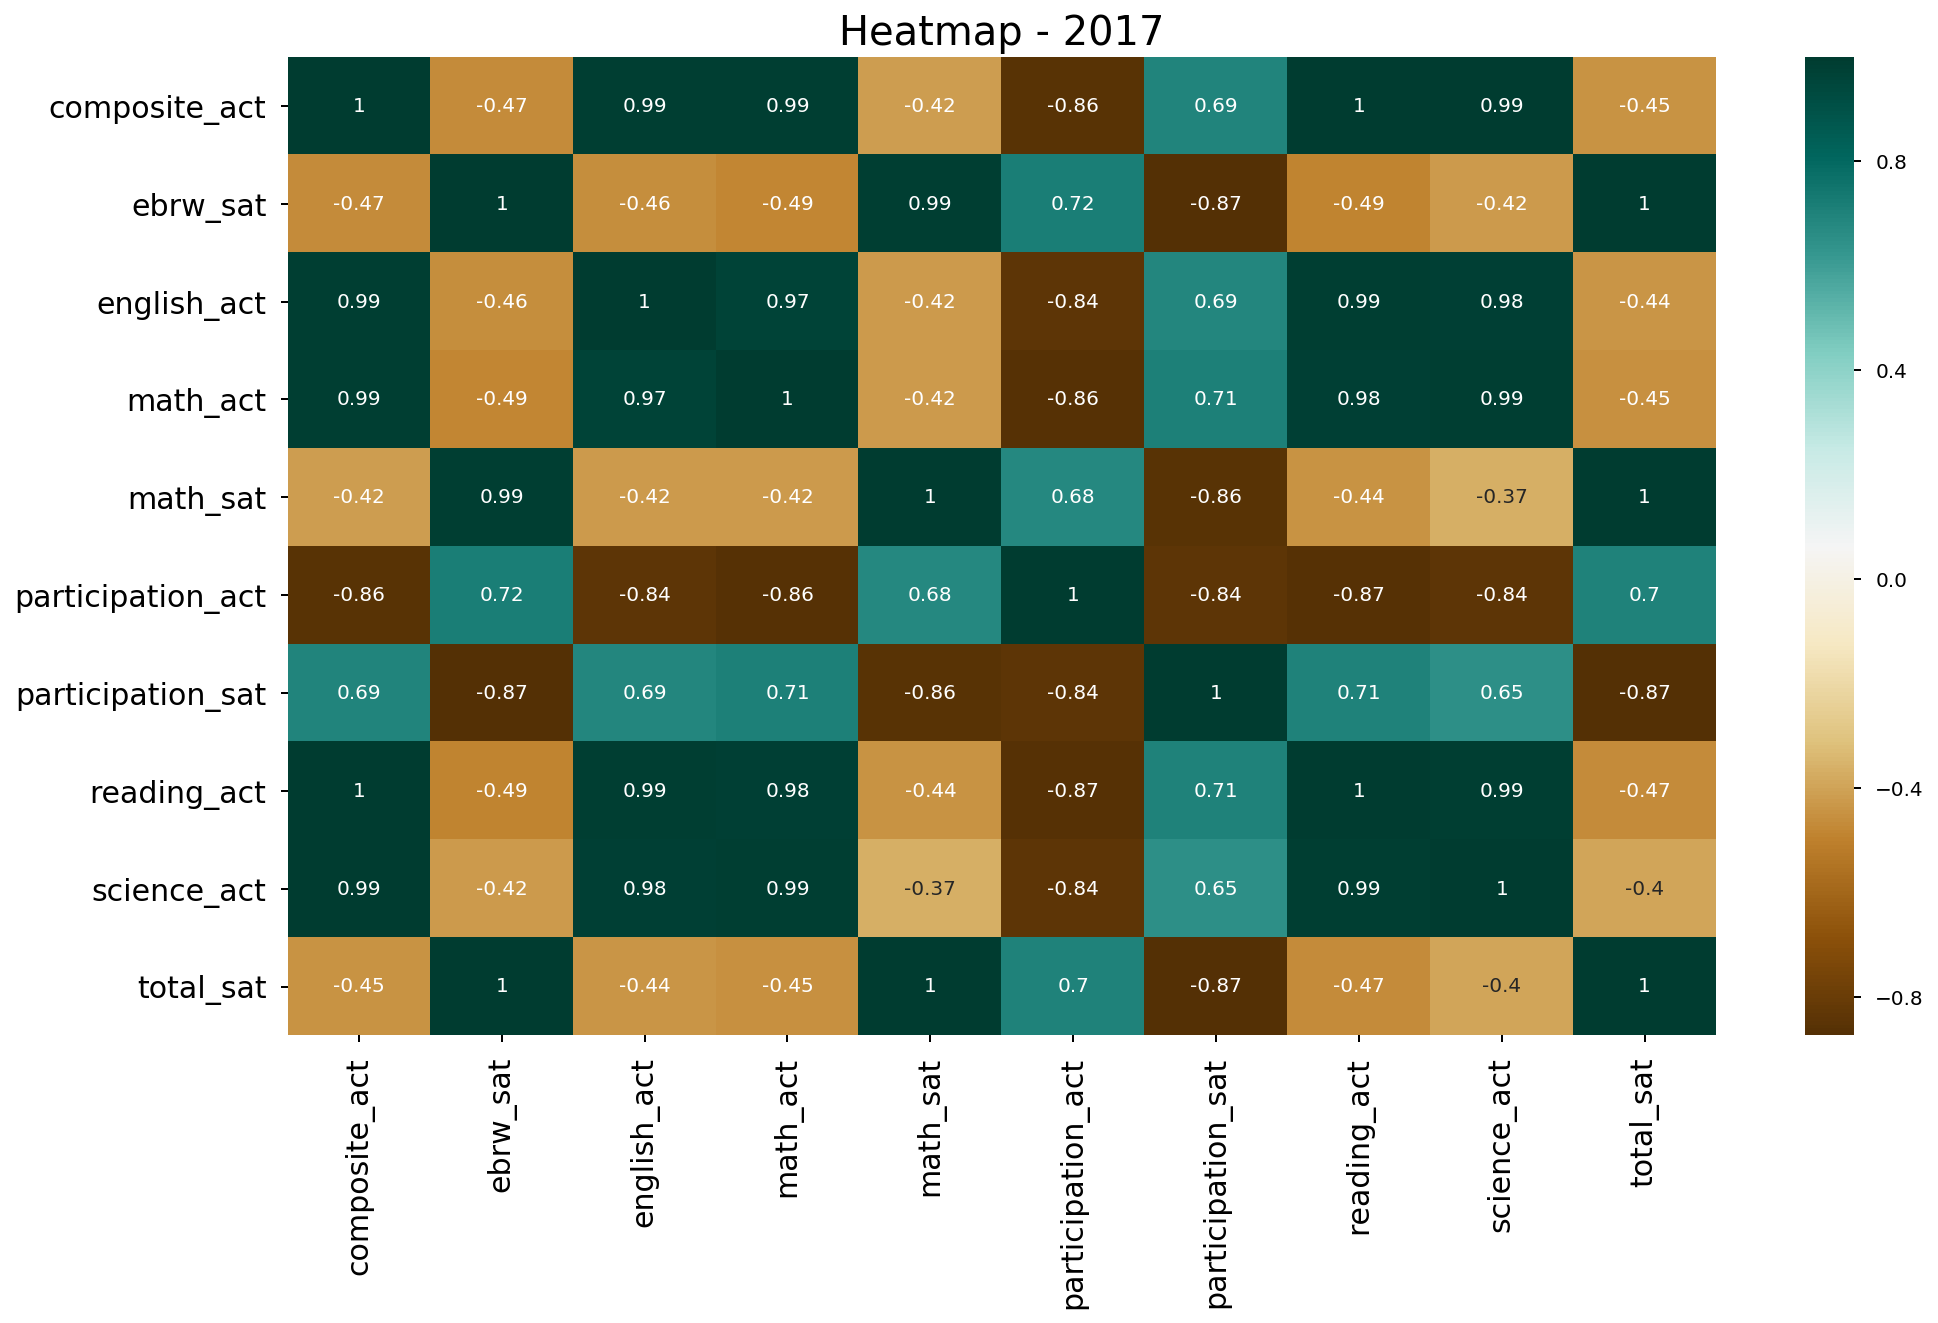

In [117]:
plt.style.use('seaborn-notebook')

plt.figure(figsize=(16,9))

plt.title('Heatmap - 2017', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

sns.heatmap(df[df['year'] == '2017'].corr(), annot=True, cmap='BrBG');

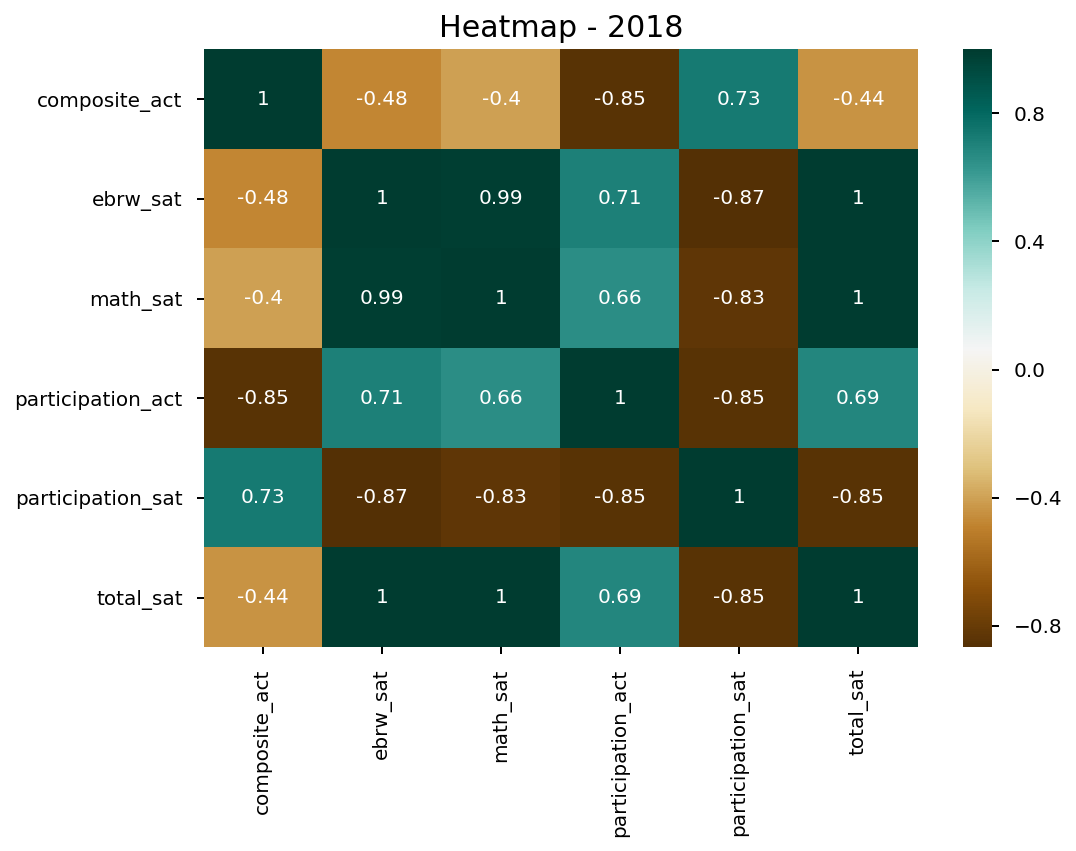

In [118]:
plt.title('Heatmap - 2018', fontsize=15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns.heatmap(df[df['year'] == '2018'][['composite_act','ebrw_sat','math_sat','participation_act', 'participation_sat','total_sat']].corr()
            , annot=True
            , cmap='BrBG');

We can see that the composite and total scores for the exams are almost perfectly positively correlated with scores of the individual sections (and visa versa), which makes a lot of intuitive sense. A higher score in an individual section means a higher overall score.

Participation in the two exams are also closely correlated in the negative direction. As one would expect, states that have a high/low participation in one exam tend to have a low/high participation rate in the other exam. This is understandable since students only need one of the exams for their college applications.

Participation is also highly negatively correlated with exam scores. This makes sense as participation in either exam is mandatory in some states, which means that those students who don't care for the exam and have not studied for it also have to take it, most likely scoring low points and pulling the average down. In states with extremely low participation rates, test takers would likely only be students who have really studied for the exam and are keen to score high points to strenghten their university applications. In such states, the mean scores would be high.

Another interesting area we can investigate is the correlation between individual sections of exams to discern whether states that do well in a given section tend to well in another particular section. It turns out that for both the SAT and ACT, the scores for individual sections are highly positively correlated. States that do well in one section tends to do well in the other sections. 

### Histograms

In [119]:
# here, i use a variety of visualisation libraries to get more practice with each

def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20, 20));  
    fig.subplots_adjust(hspace=0.5);
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns): 
        ax[i].hist(dataframe[column]);
        ax[i].set_title(f'Distribution of {column}', fontsize=20);

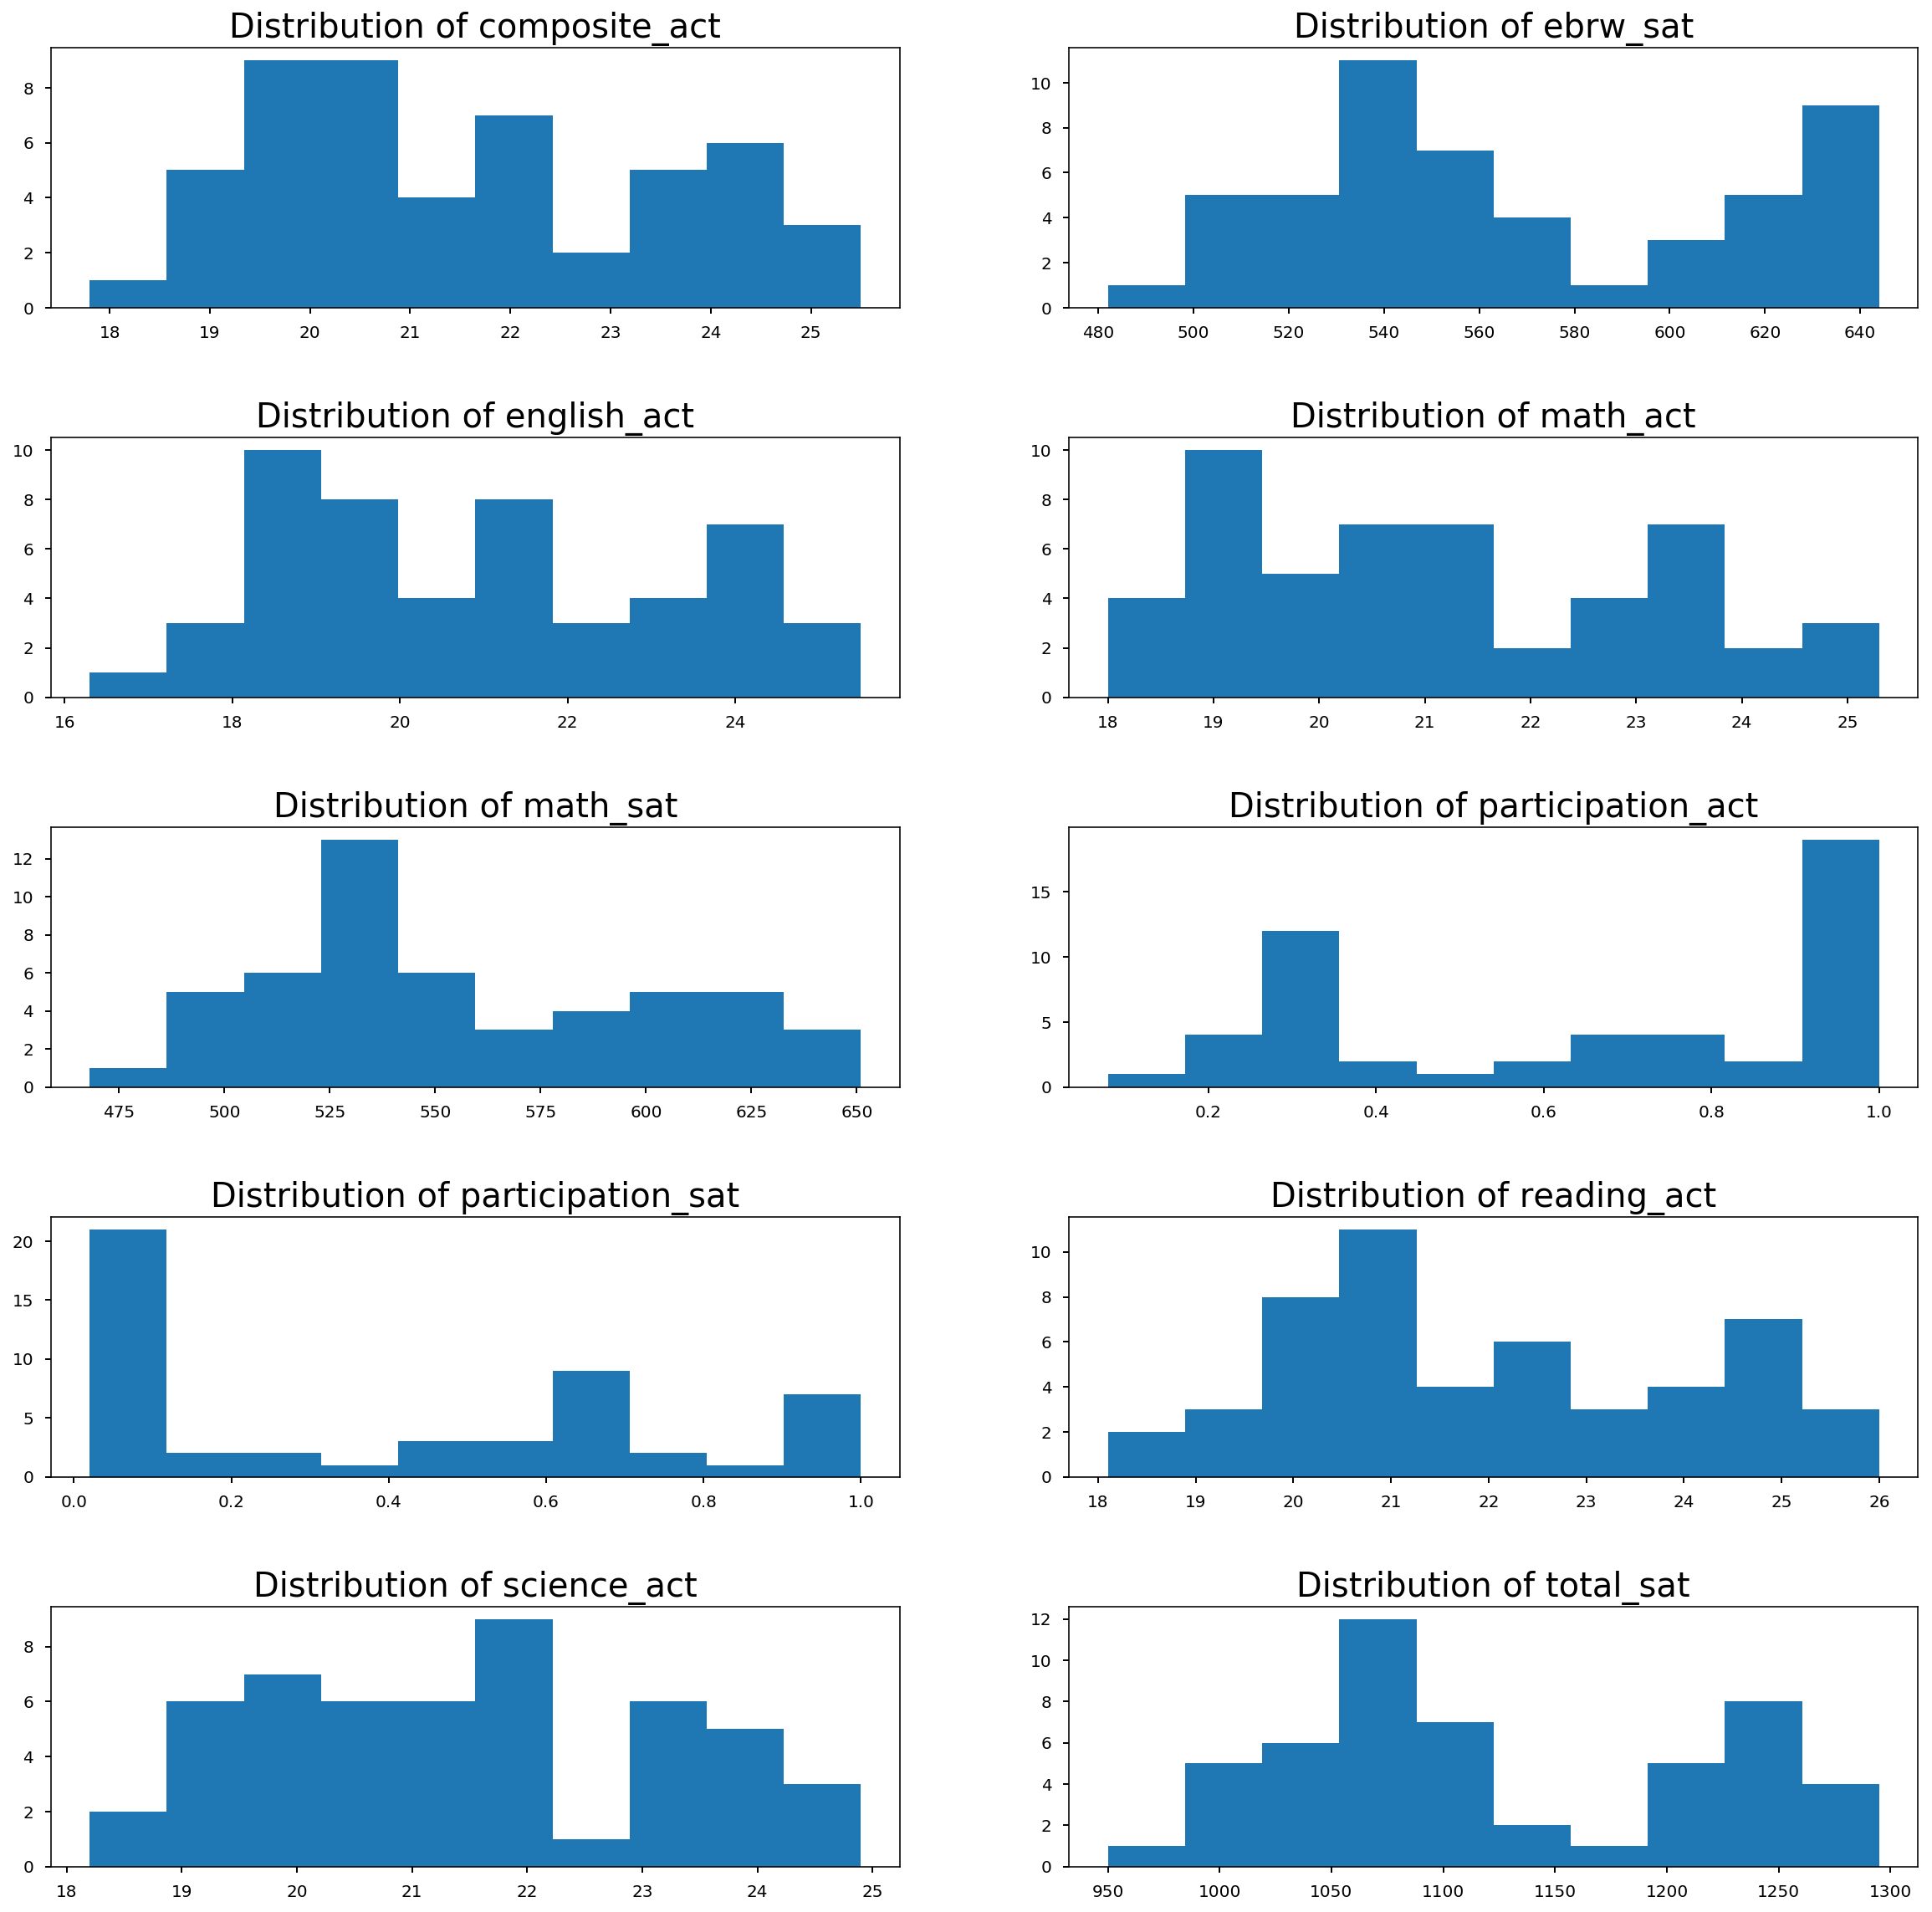

In [120]:
subplot_histograms(df[df.year=='2017'], numeric_columns)

#### Participation rates for SAT & ACT

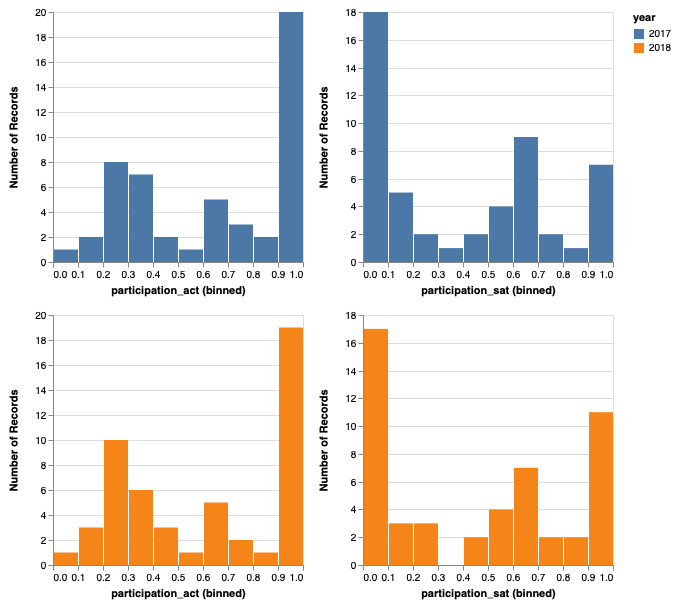

In [121]:
# done with altair 

act = alt.Chart(df[df.year == '2017']).mark_bar().encode(
    alt.X('participation_act', bin=True),
    y='count(*):Q',
    color='year').properties(width=250, height=250)
    
act2 = alt.Chart(df[df.year == '2018']).mark_bar().encode(
    alt.X('participation_act', bin=True),
    y='count(*):Q',
    color='year').properties(width=250, height=250)

sat = alt.Chart(df[df.year == '2017']).mark_bar().encode(
    alt.X('participation_sat', bin=True),
    y='count(*):Q',
    color='year').properties(width=250, height=250)

sat2 = alt.Chart(df[df.year == '2018']).mark_bar().encode(
    alt.X('participation_sat', bin=True),
    y='count(*):Q',
    color='year').properties(width=250, height=250)

act & act2 | sat & sat2

ACT seems to be a more popular exam than the SAT. The most populous bin in the distribution of the ACT is the 90%-100% bin, whereas for the SAT it's the 0-10% bin.

It would be interesting to see a bar chart with all the states on the horizontal axis and the participation rate of states on the vertical axis grouped by the year so we can see how that metric moved in each state.

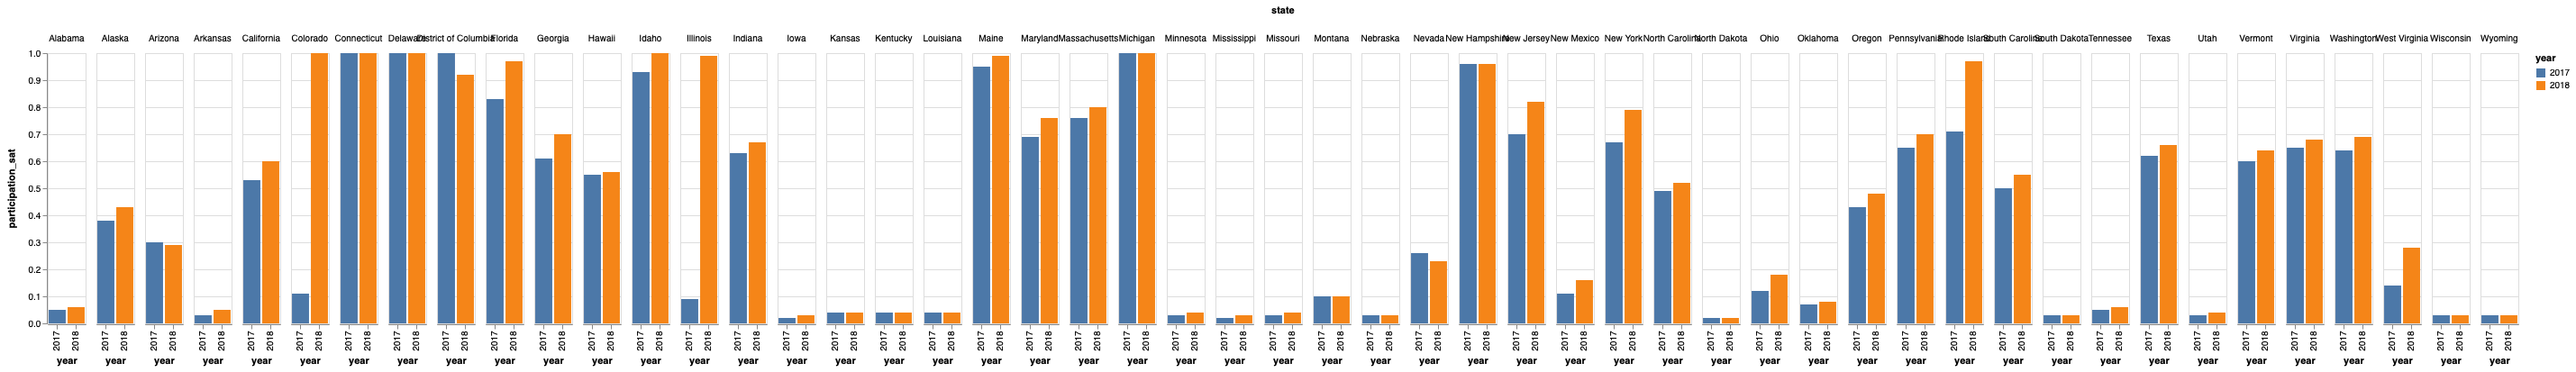

In [177]:
alt.Chart(df).mark_bar().encode(
    x='year:O',
    y='participation_sat:Q',
    color='year',
    column='state:O'
)

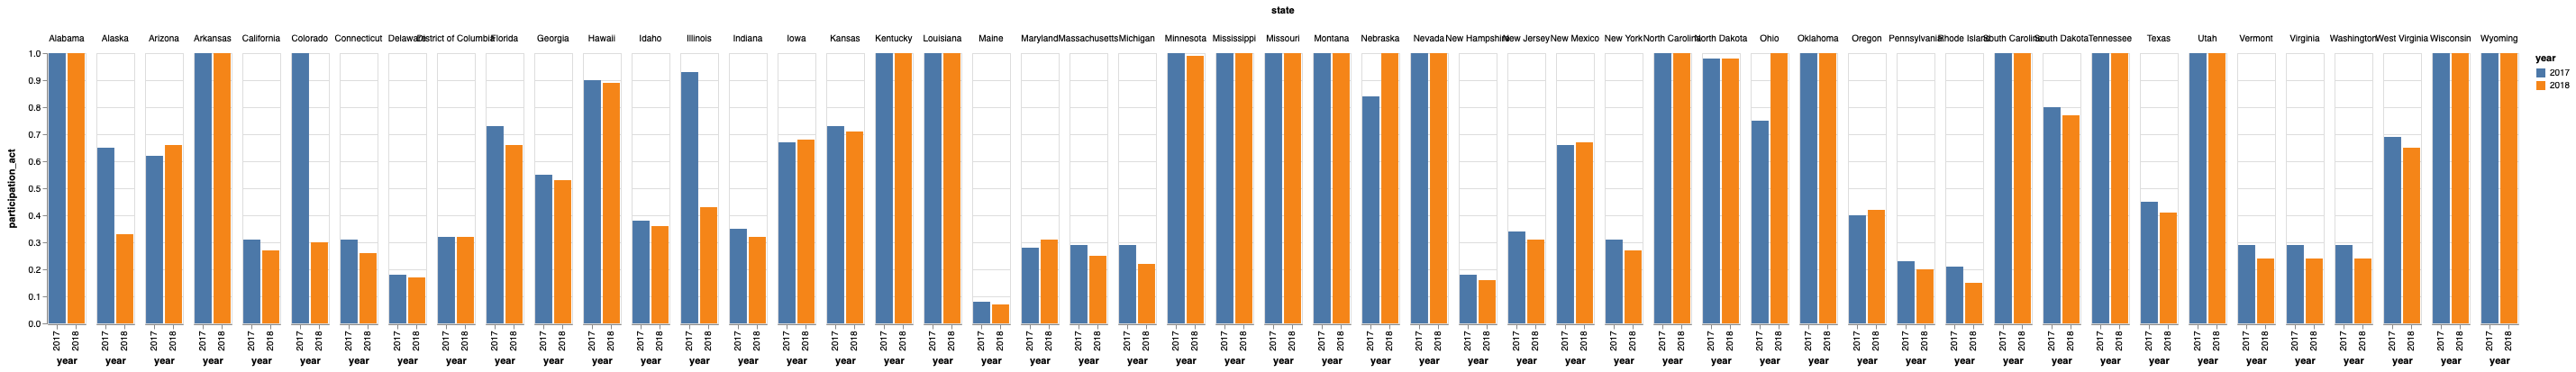

In [178]:
alt.Chart(df).mark_bar().encode(
    x='year:O',
    y='participation_act:Q',
    color='year',
    column='state:O'
)

These charts are pretty convoluted, but can be useful if we have a particular state in mind that we want to zoom into. 

#### Math scores for SAT & ACT

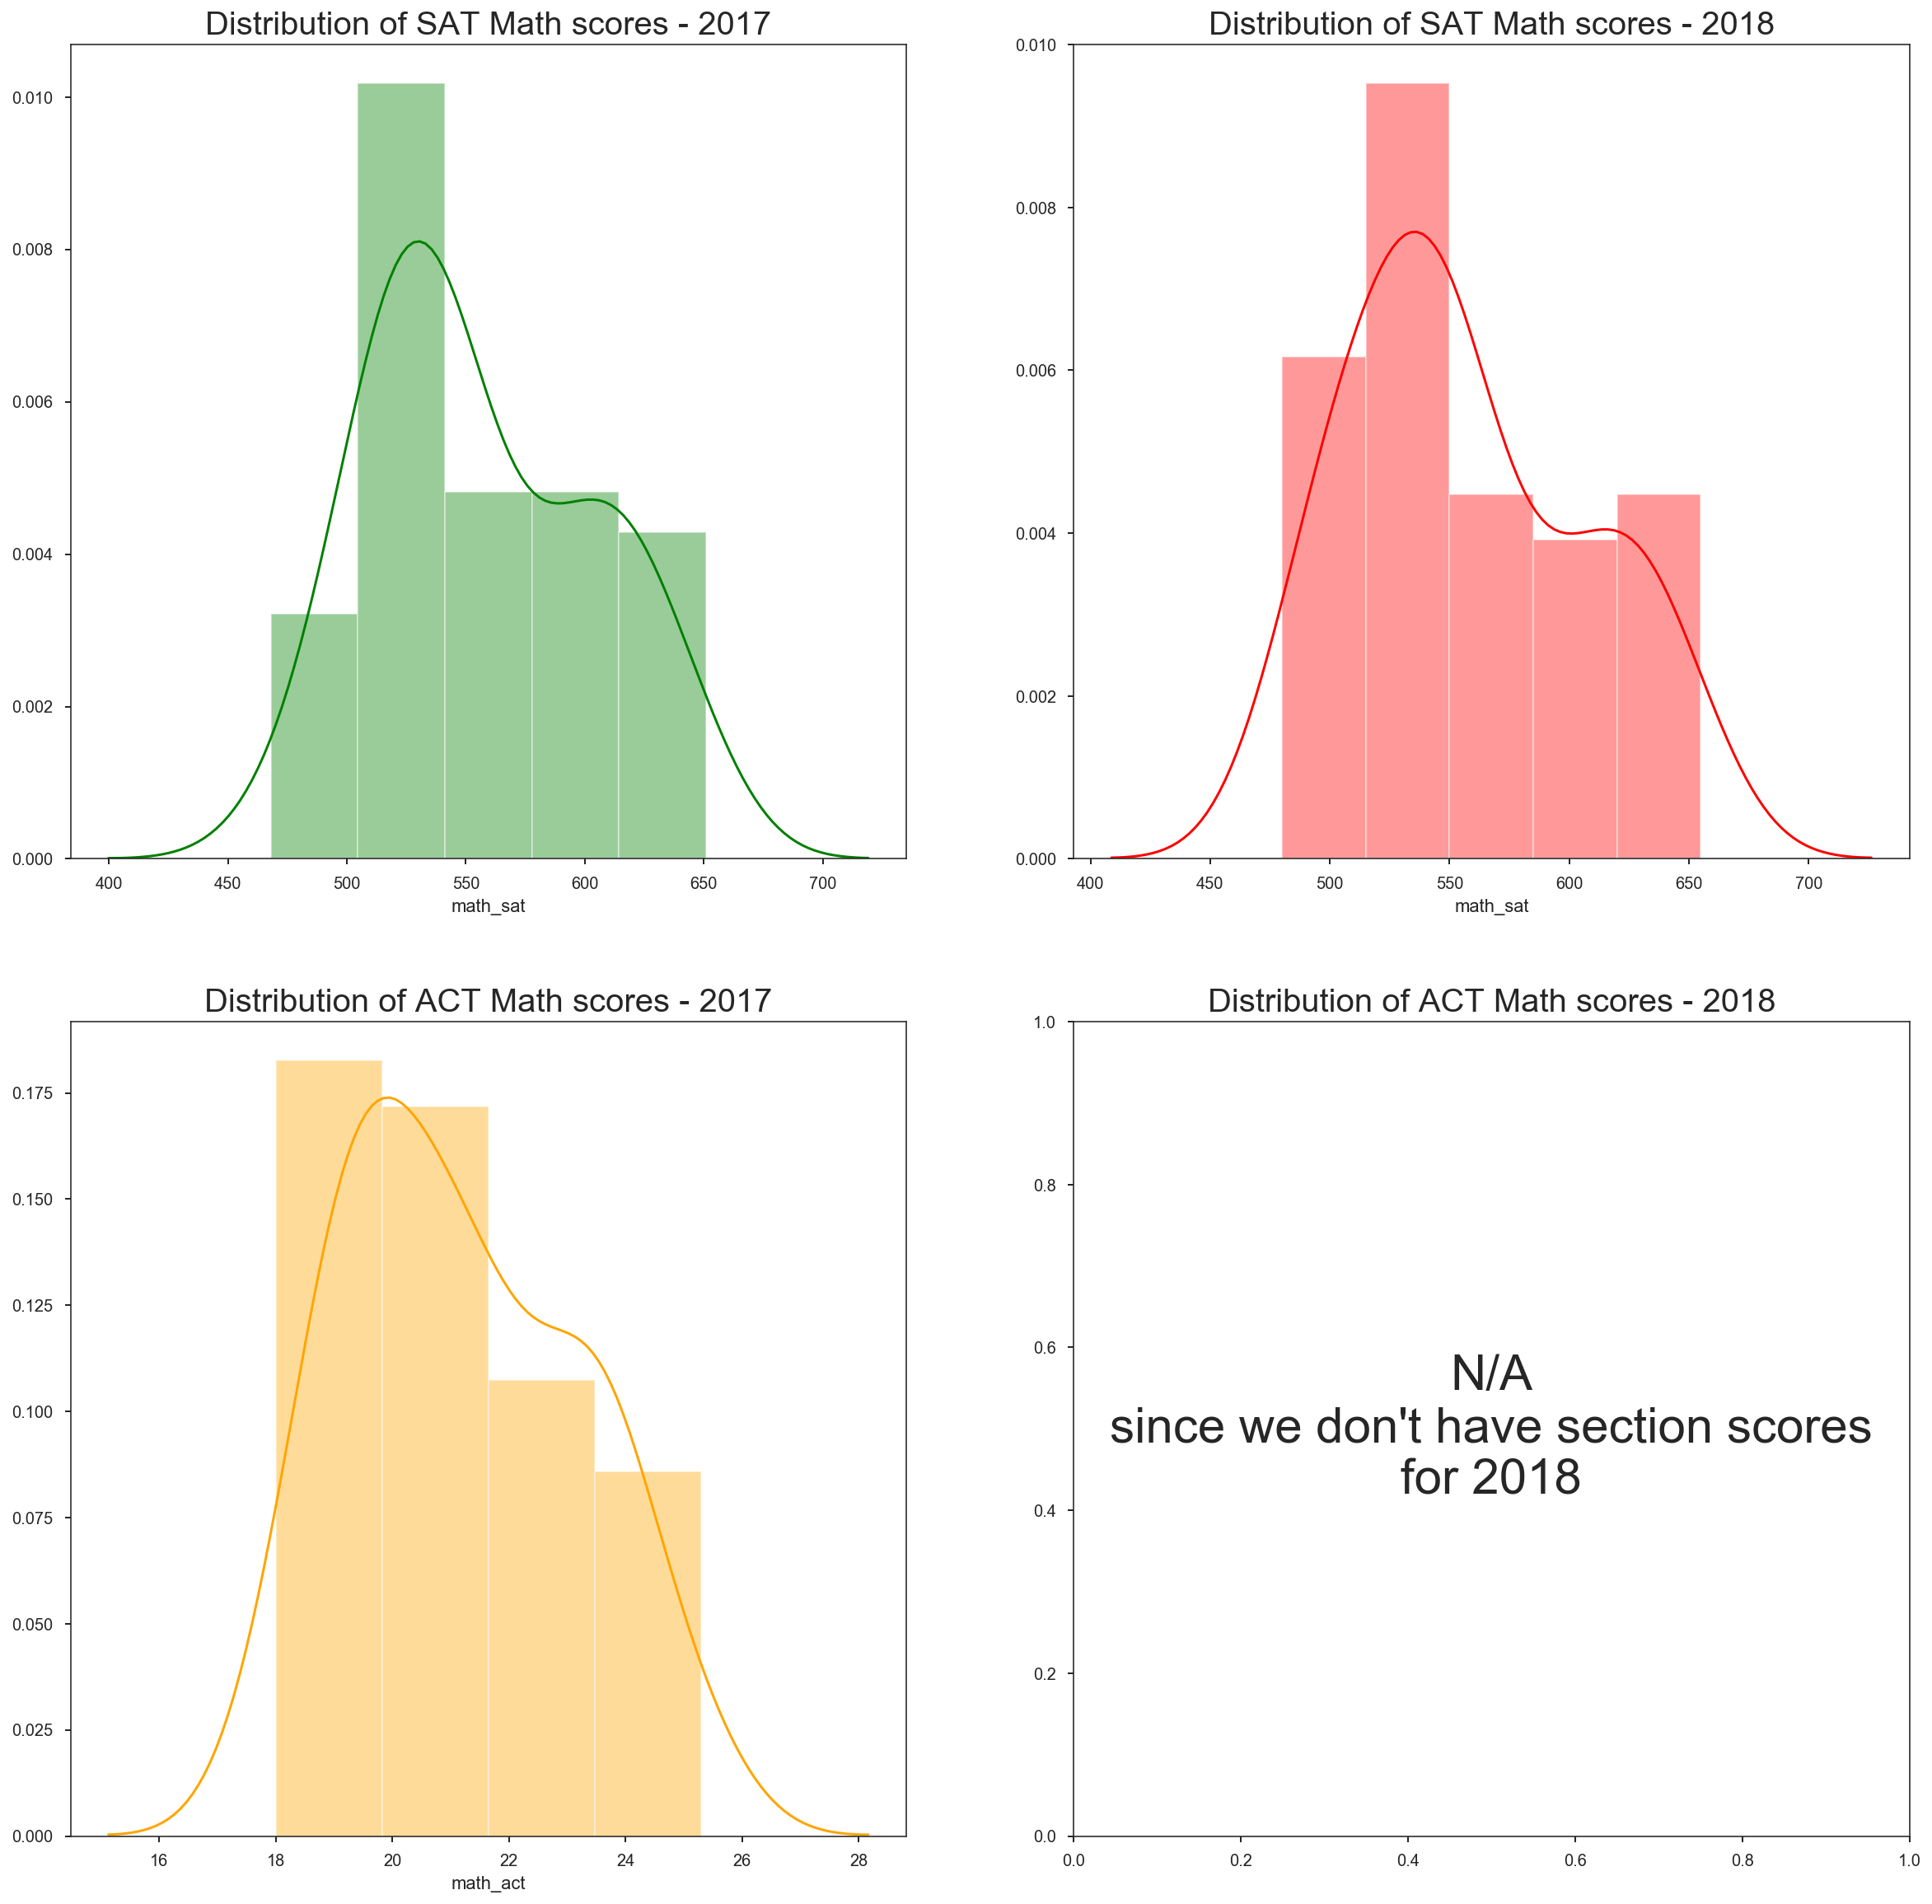

In [122]:
# done with seaborn

sns.set_style('ticks')

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
axs = axs.ravel()
sns.set(font_scale = 1.6)

sns.distplot(df[df.year =='2017']['math_sat'], ax = axs[0], color='green');
axs[0].set_title('Distribution of SAT Math scores - 2017', fontsize=20);

sns.distplot(df[df.year =='2018']['math_sat'], ax = axs[1], color='red');
axs[1].set_title('Distribution of SAT Math scores - 2018', fontsize=20);

sns.distplot(df[df.year =='2017']['math_act'], ax = axs[2], color='orange');
axs[2].set_title('Distribution of ACT Math scores - 2017', fontsize=20);

axs[3].text(x = 0.5, y = 0.5, s = 'N/A\nsince we don\'t have section scores\nfor 2018', ha = 'center', va = 'center', size = 30);
axs[3].set_title('Distribution of ACT Math scores - 2018', fontsize=20);

Most math scores for the SAT have lied between 500 and 550 for both years. The math scores for the ACT show a decreasing pattern whereby the frequency of scores decrease as score increases.

#### Reading and verbal scores for SAT & ACT

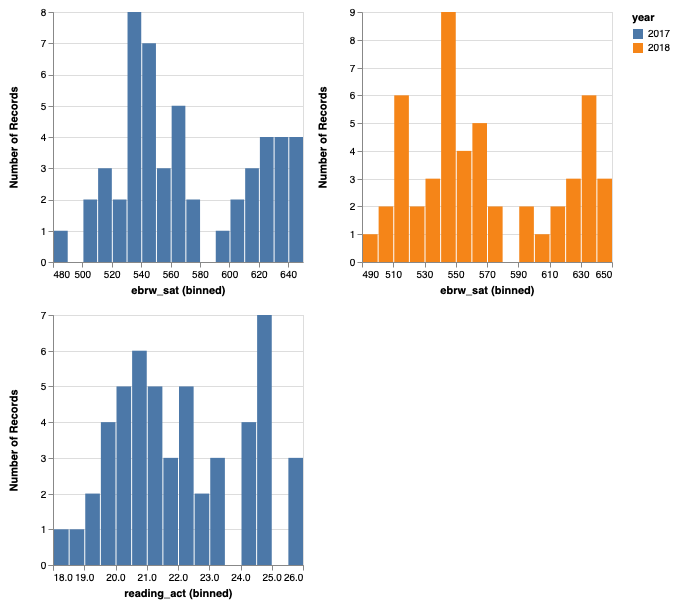

In [123]:
# done with altair

s = alt.Chart(df[df.year == '2017']).mark_bar().encode(
    alt.X('ebrw_sat', bin=alt.BinParams(maxbins=20)),
    y='count(*):Q',
    color='year:N'
    ).properties(width=250, height=250)
    
s2 = alt.Chart(df[df.year == '2018']).mark_bar().encode(
    alt.X('ebrw_sat', bin=alt.BinParams(maxbins=20)),
    y='count(*):Q',
    color= 'year:N'
    ).properties(width=250, height=250)

a = alt.Chart(df[df.year == '2017']).mark_bar().encode(
    alt.X('reading_act', bin=alt.BinParams(maxbins=20)),
    y='count(*):Q',
    color='year').properties(width=250, height=250)

c = alt.hconcat(s, s2)
c2= alt.vconcat(c, a)

c2

### Scatter plots

#### SAT vs. ACT math and reading sections - 2017

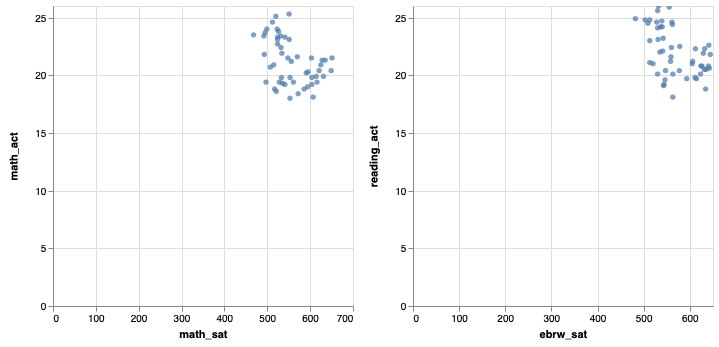

In [217]:
c = alt.Chart(df[df.year == '2017']).mark_circle(
                                ).encode(x='math_sat', y='math_act', tooltip='state'
                                ).properties(width=300, height=300).interactive()

d = alt.Chart(df[df.year == '2017']).mark_circle(
                                ).encode(x='ebrw_sat:Q', y='reading_act:Q', tooltip='state'
                                ).properties(width=300, height=300).interactive()

alt.hconcat(c, d)

High Math/EBRW SAT score != High Math/Reading ACT score

#### SAT vs. ACT total/composite scores - 2017

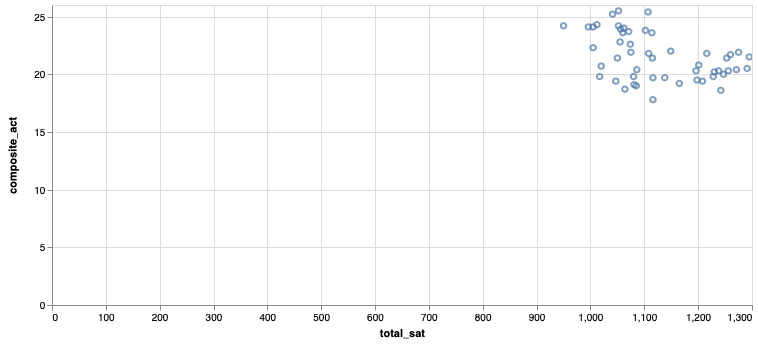

In [222]:
alt.Chart(df[df.year == '2017']).mark_point(
                                ).encode(x='total_sat', y='composite_act', tooltip='state'
                                ).properties(width=700, height=300).interactive()

High Total SAT score != High Composite ACT score

#### Total scores for SAT 2017 vs. 2018

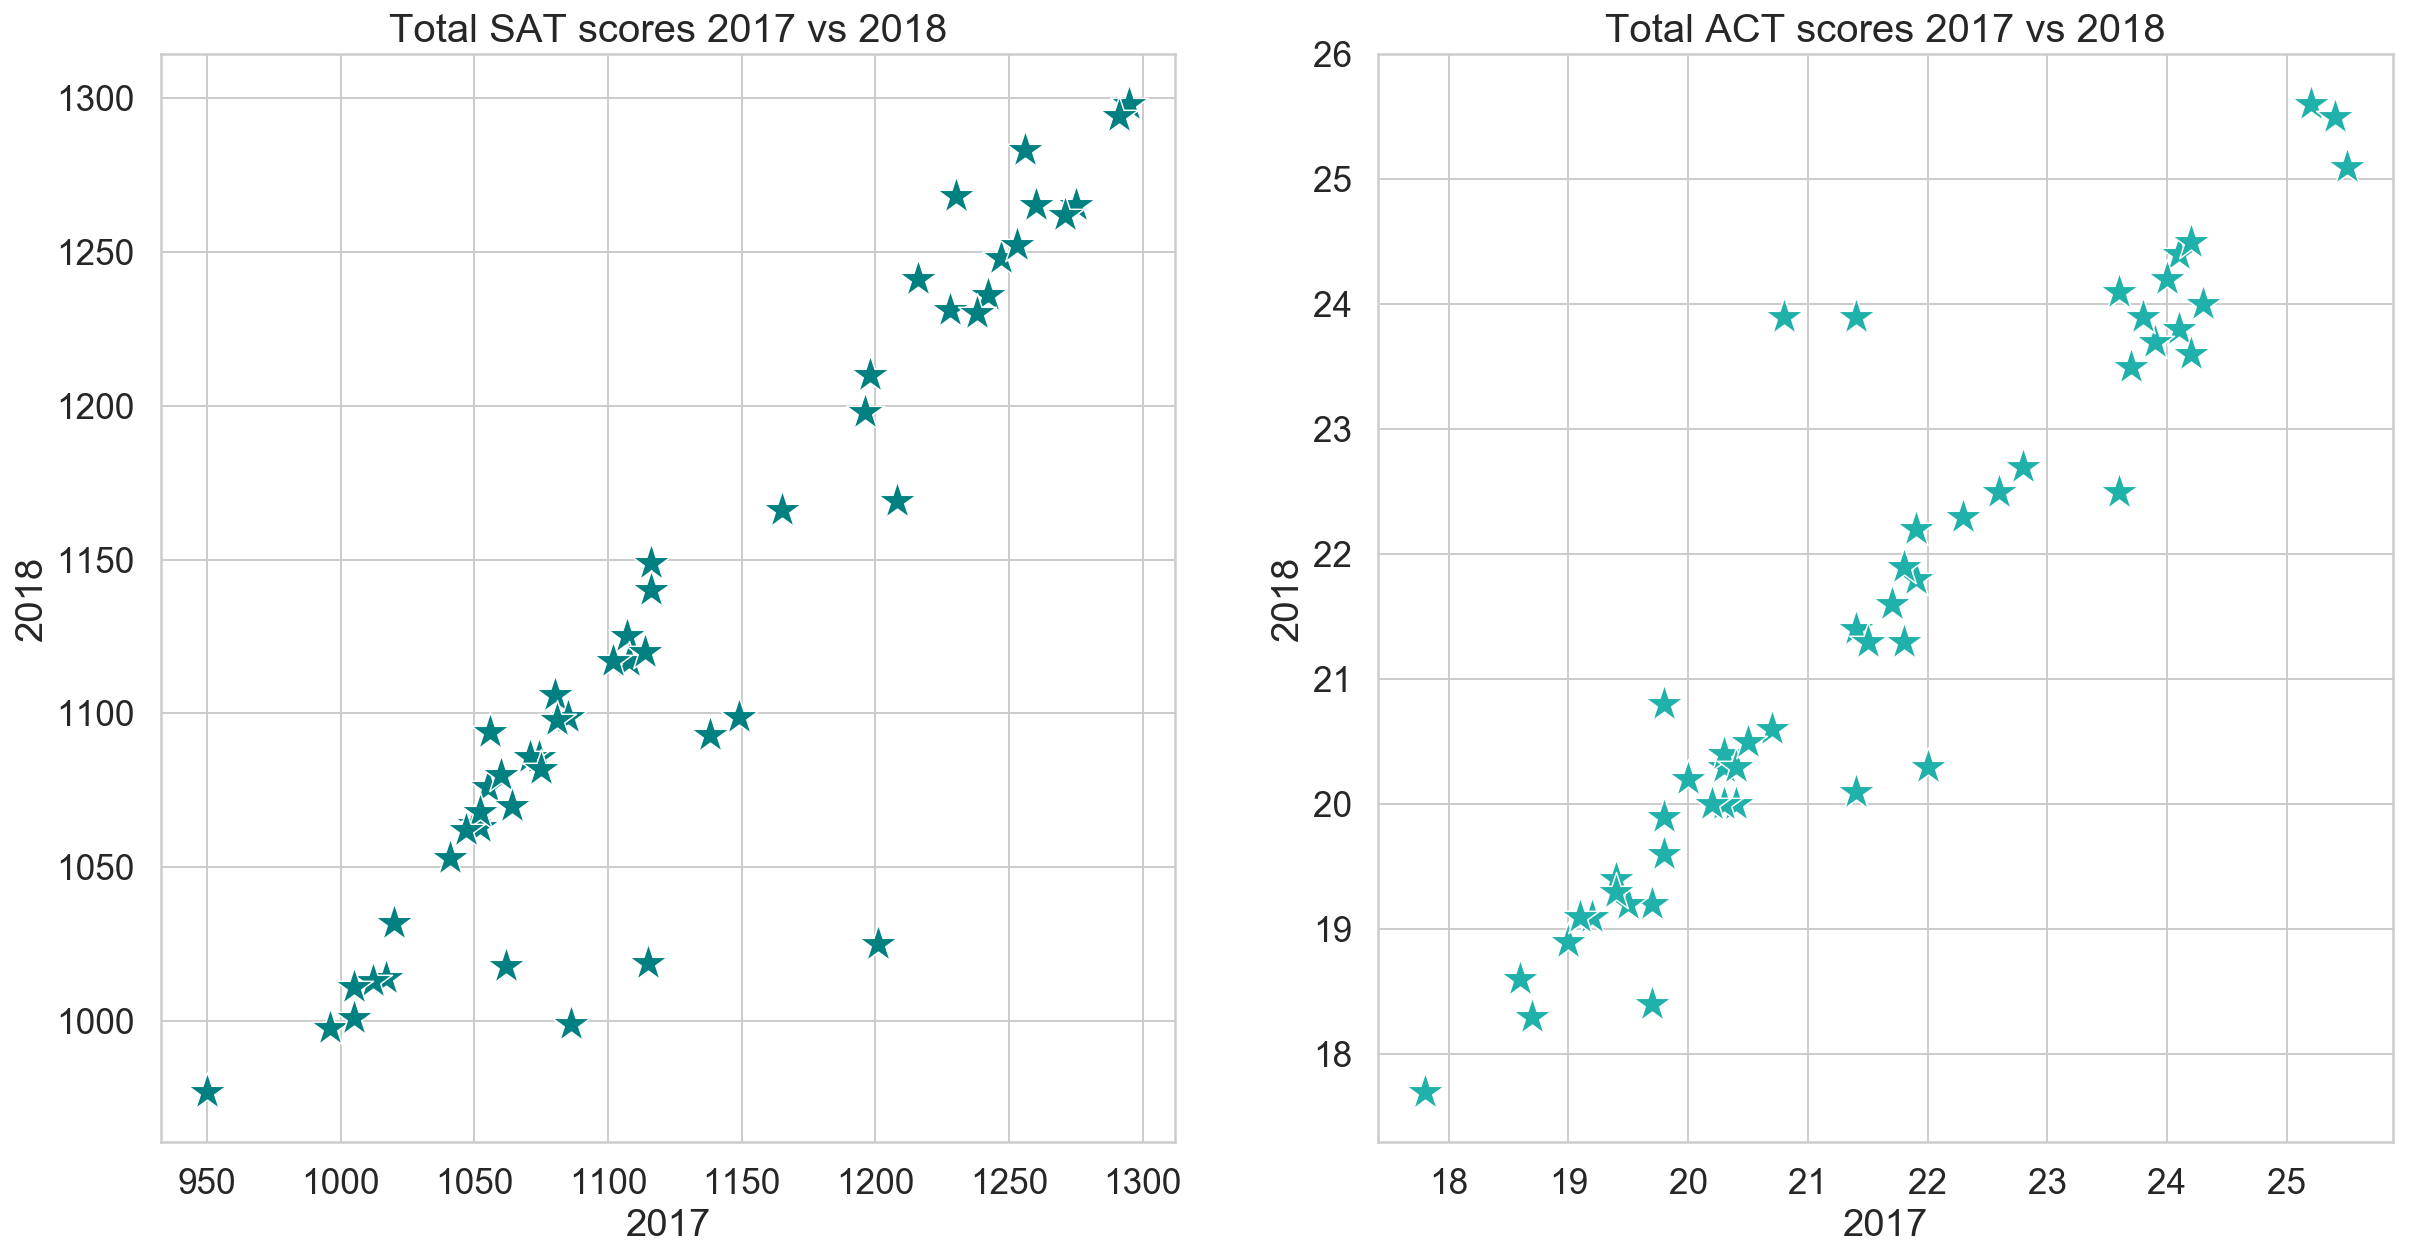

In [230]:
plt.subplots(1, 2, figsize=(20, 10));

plt.subplot(121)
sns.scatterplot(x=df[df.year == '2017']['total_sat']
                , y=df[df.year == '2018']['total_sat']
                , color='teal', marker='*', s=400);

plt.title('Total SAT scores 2017 vs 2018', fontsize=20);
plt.xlabel('2017');
plt.ylabel('2018');

plt.subplot(122)
sns.scatterplot(x=df[df.year == '2017']['composite_act']
                , y=df[df.year == '2018']['composite_act']
                , color='lightseagreen', marker='*', s=400);

plt.title('Total ACT scores 2017 vs 2018', fontsize=20);
plt.xlabel('2017');
plt.ylabel('2018');

States that had a high SAT score in 2017 also tended to have a high SAT score in 2018. Interestingly, a lot of states got lower SAT scores in 2018 than they did in 2017, but no state got a higher score in 2018 than they did in 2017. 

States that had a high ACT score in 2017 also tended to have a high ACT score in 2018. Some states got better averages in 2018 compared to 2017, and some states got lower averages in 2018 compared to 2016.

The heatmaps above had shown that participation rates in the exams are negatively correlated with the scores from the exams. Let's also visualise this with a scatter plot. 

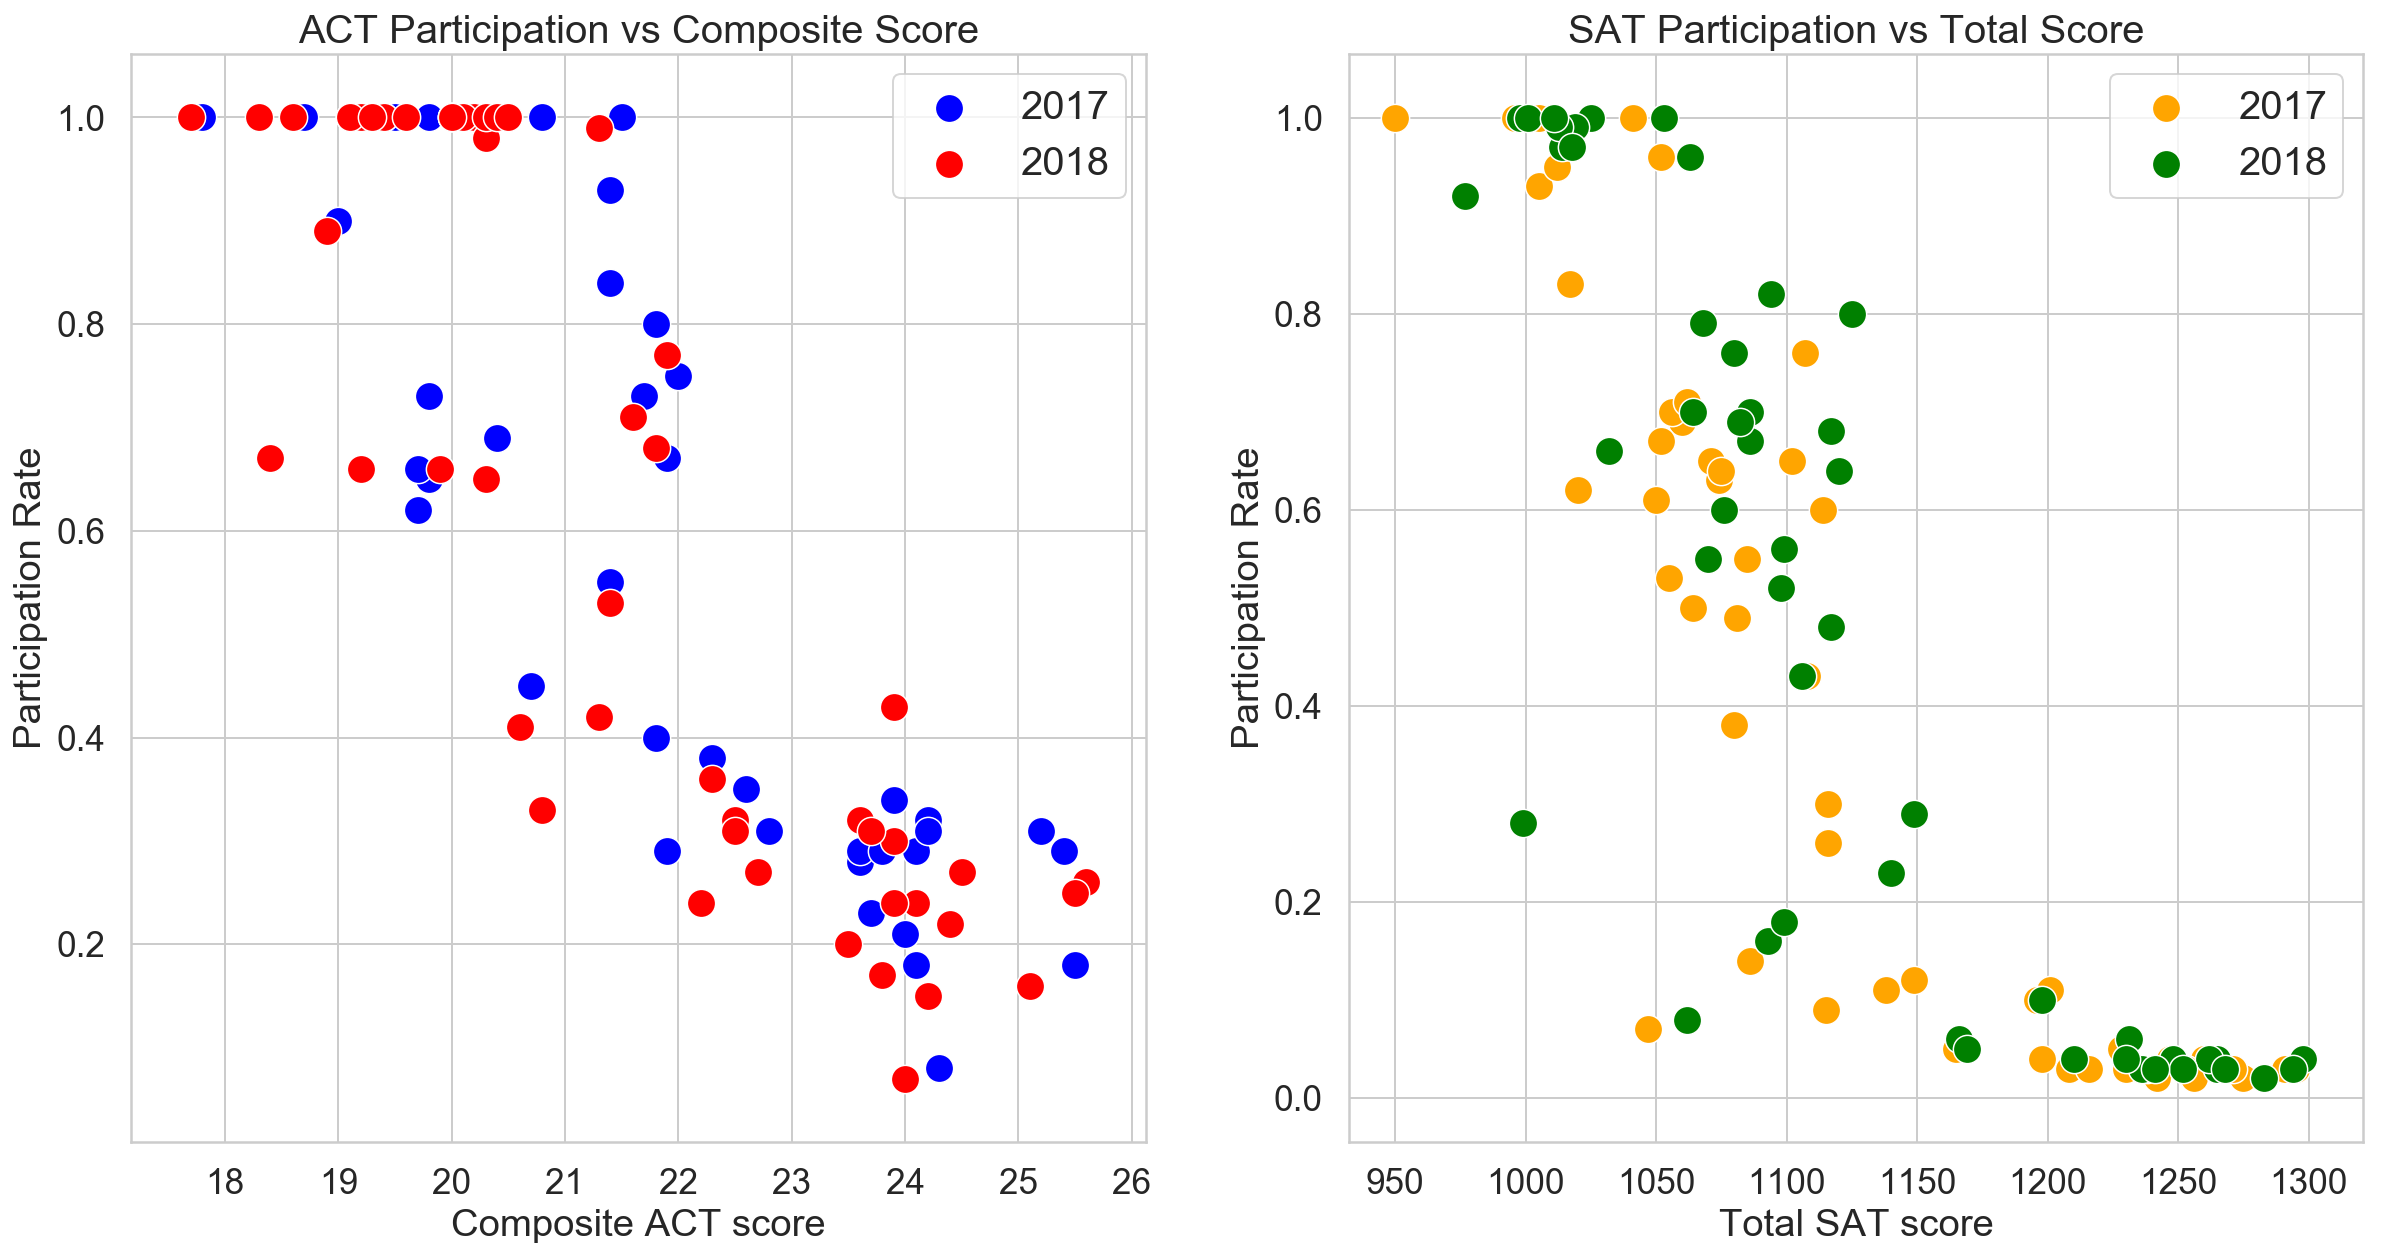

In [231]:
plt.subplots(1, 2, figsize=(20, 10));

plt.subplot(121)
sns.scatterplot(x=df[df.year == '2017']['composite_act']
                , y=df[df.year == '2017']['participation_act']
                , color='blue', marker='o', s=200);
sns.scatterplot(x=df[df.year == '2018']['composite_act']
                , y=df[df.year == '2018']['participation_act']
                , color='red', marker='o', s=200);

plt.title('ACT Participation vs Composite Score', fontsize=20);
plt.xlabel('Composite ACT score');
plt.ylabel('Participation Rate');
plt.legend(('2017', '2018'), prop={'size':20});

plt.subplot(122)
sns.scatterplot(x=df[df.year == '2017']['total_sat']
                , y=df[df.year == '2017']['participation_sat']
                , color='orange', marker='o', s=200);
sns.scatterplot(x=df[df.year == '2018']['total_sat']
                , y=df[df.year == '2018']['participation_sat']
                , color='green', marker='o', s=200);

plt.title('SAT Participation vs Total Score', fontsize=20);
plt.xlabel('Total SAT score');
plt.ylabel('Participation Rate');
plt.legend(('2017', '2018'), prop={'size':20});

Indeed, we see a very steep negative slope which confirms that as participation rates increase, scores decrease.

### Boxplots

In [129]:
# melt df so we can boxplot 

melted_df = pd.melt(df, id_vars=['state','year'], var_name='exam',value_name='score')

In [130]:
act=[]
sat=[]

for i, row in enumerate(list(melted_df['exam'])):
    if '_act' in row:
        act.append(i)
    elif '_sat' in row:
        sat.append(i)

print(len(act))
print(len(sat))

612
408


In [131]:
melted_df_act = melted_df.drop(melted_df.index[sat])
melted_df_sat = melted_df.drop(melted_df.index[act])

print(melted_df.shape)
print(melted_df_act.shape)
print(melted_df_sat.shape)

(1020, 4)
(612, 4)
(408, 4)


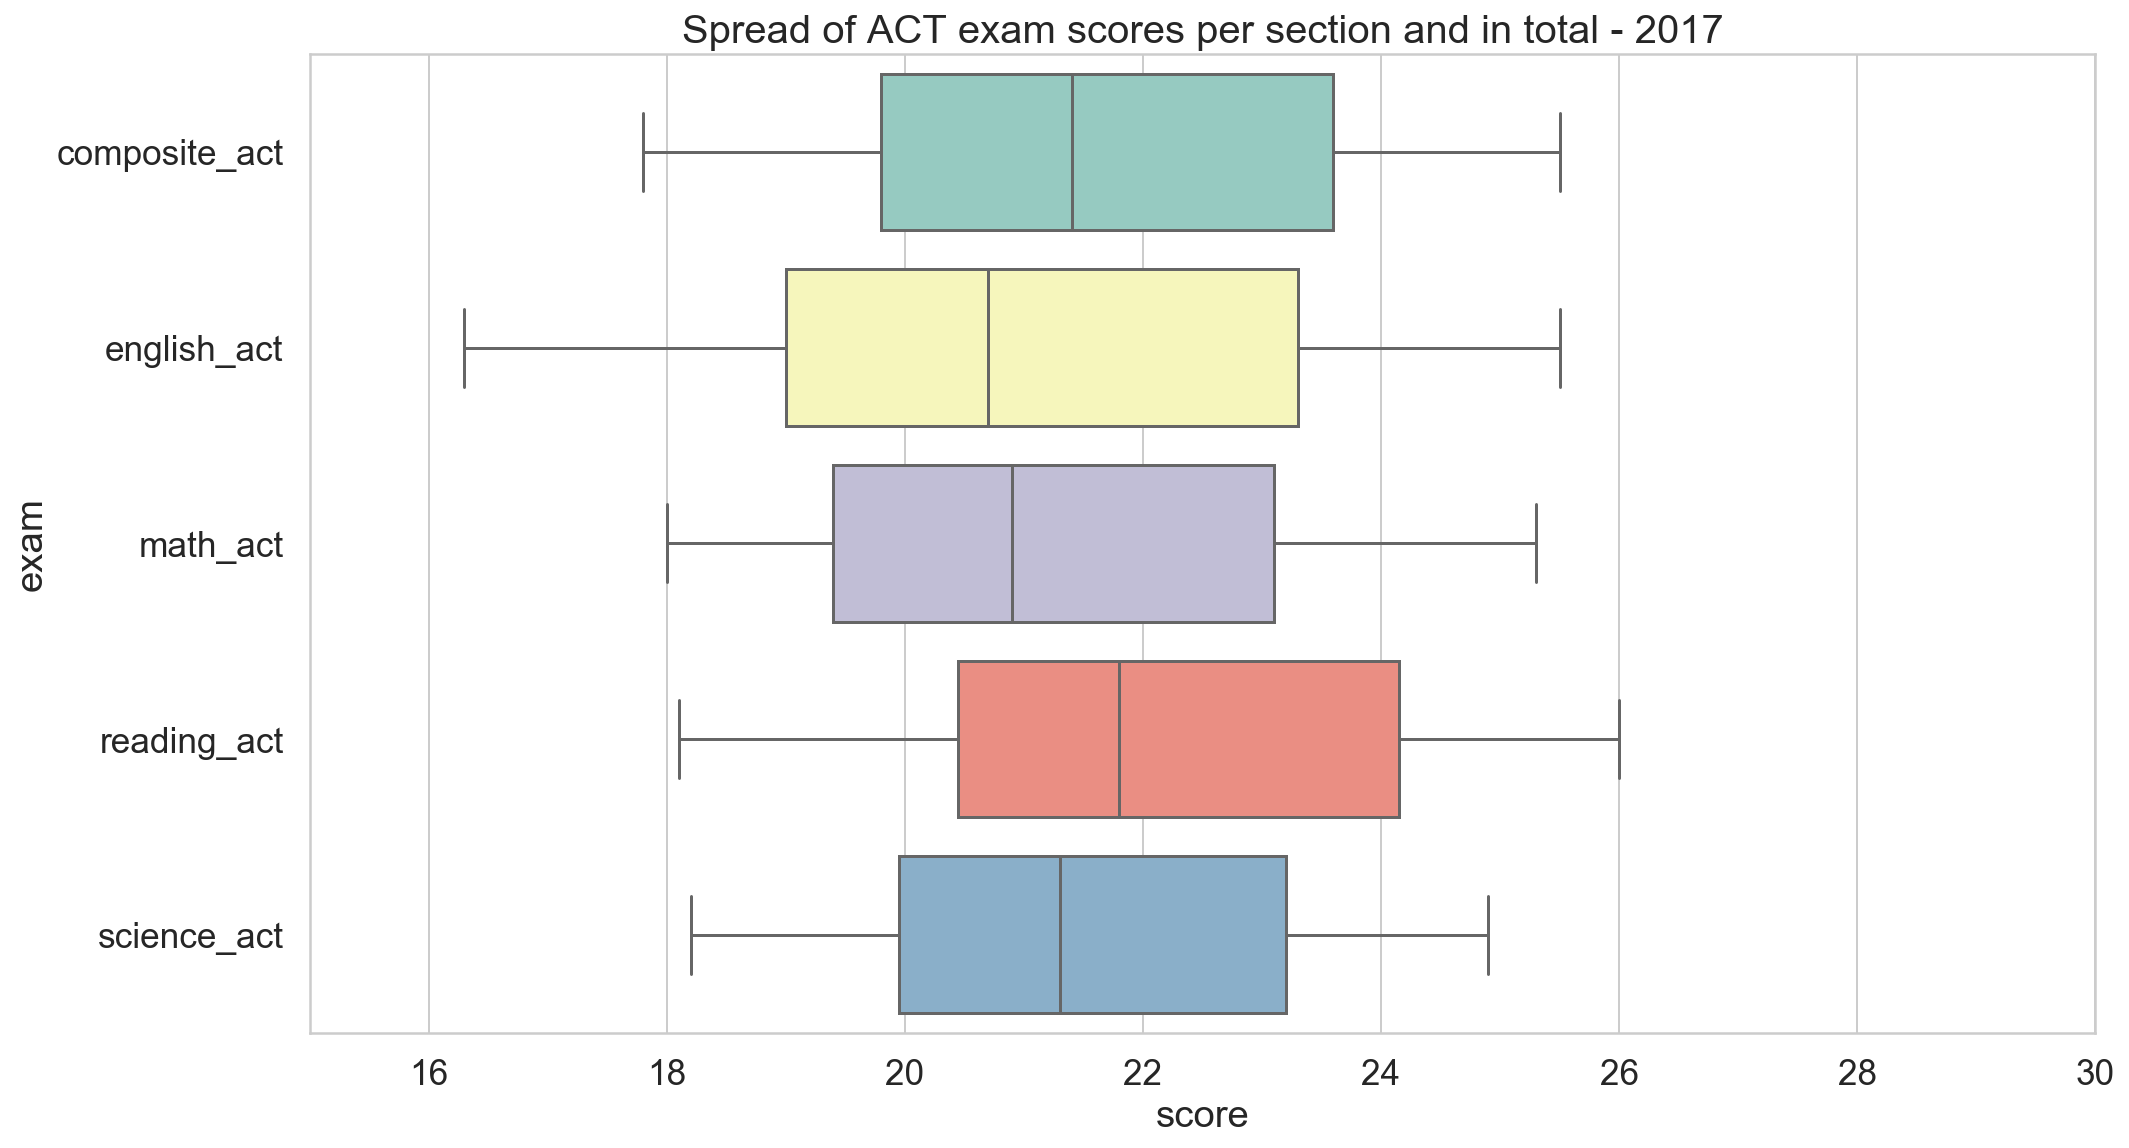

In [132]:
plt.figure(figsize=(16,9))

sns.boxplot(x='score', y='exam', 
            data=melted_df_act[(melted_df_act.year == '2017') & (melted_df_act.exam != 'participation_act')],
            palette='Set3');

plt.title('Spread of ACT exam scores per section and in total - 2017', fontsize=20);

plt.xlim([15, 30]);

The highest median score was received in the reading section, and the lowest was received in the english section. The english section also had the widest range out of all sections. The science section, on the other hand, had the tighest range. It is interesting to observe that the two more qualitative sections, english and reading, had wider ranges than the two quantitative sections, science and math. 

This intuitively makes sense as the questions in the reading and english sections can be open to different interpretations, but the questions in math and science would have a more 'sure' answer.

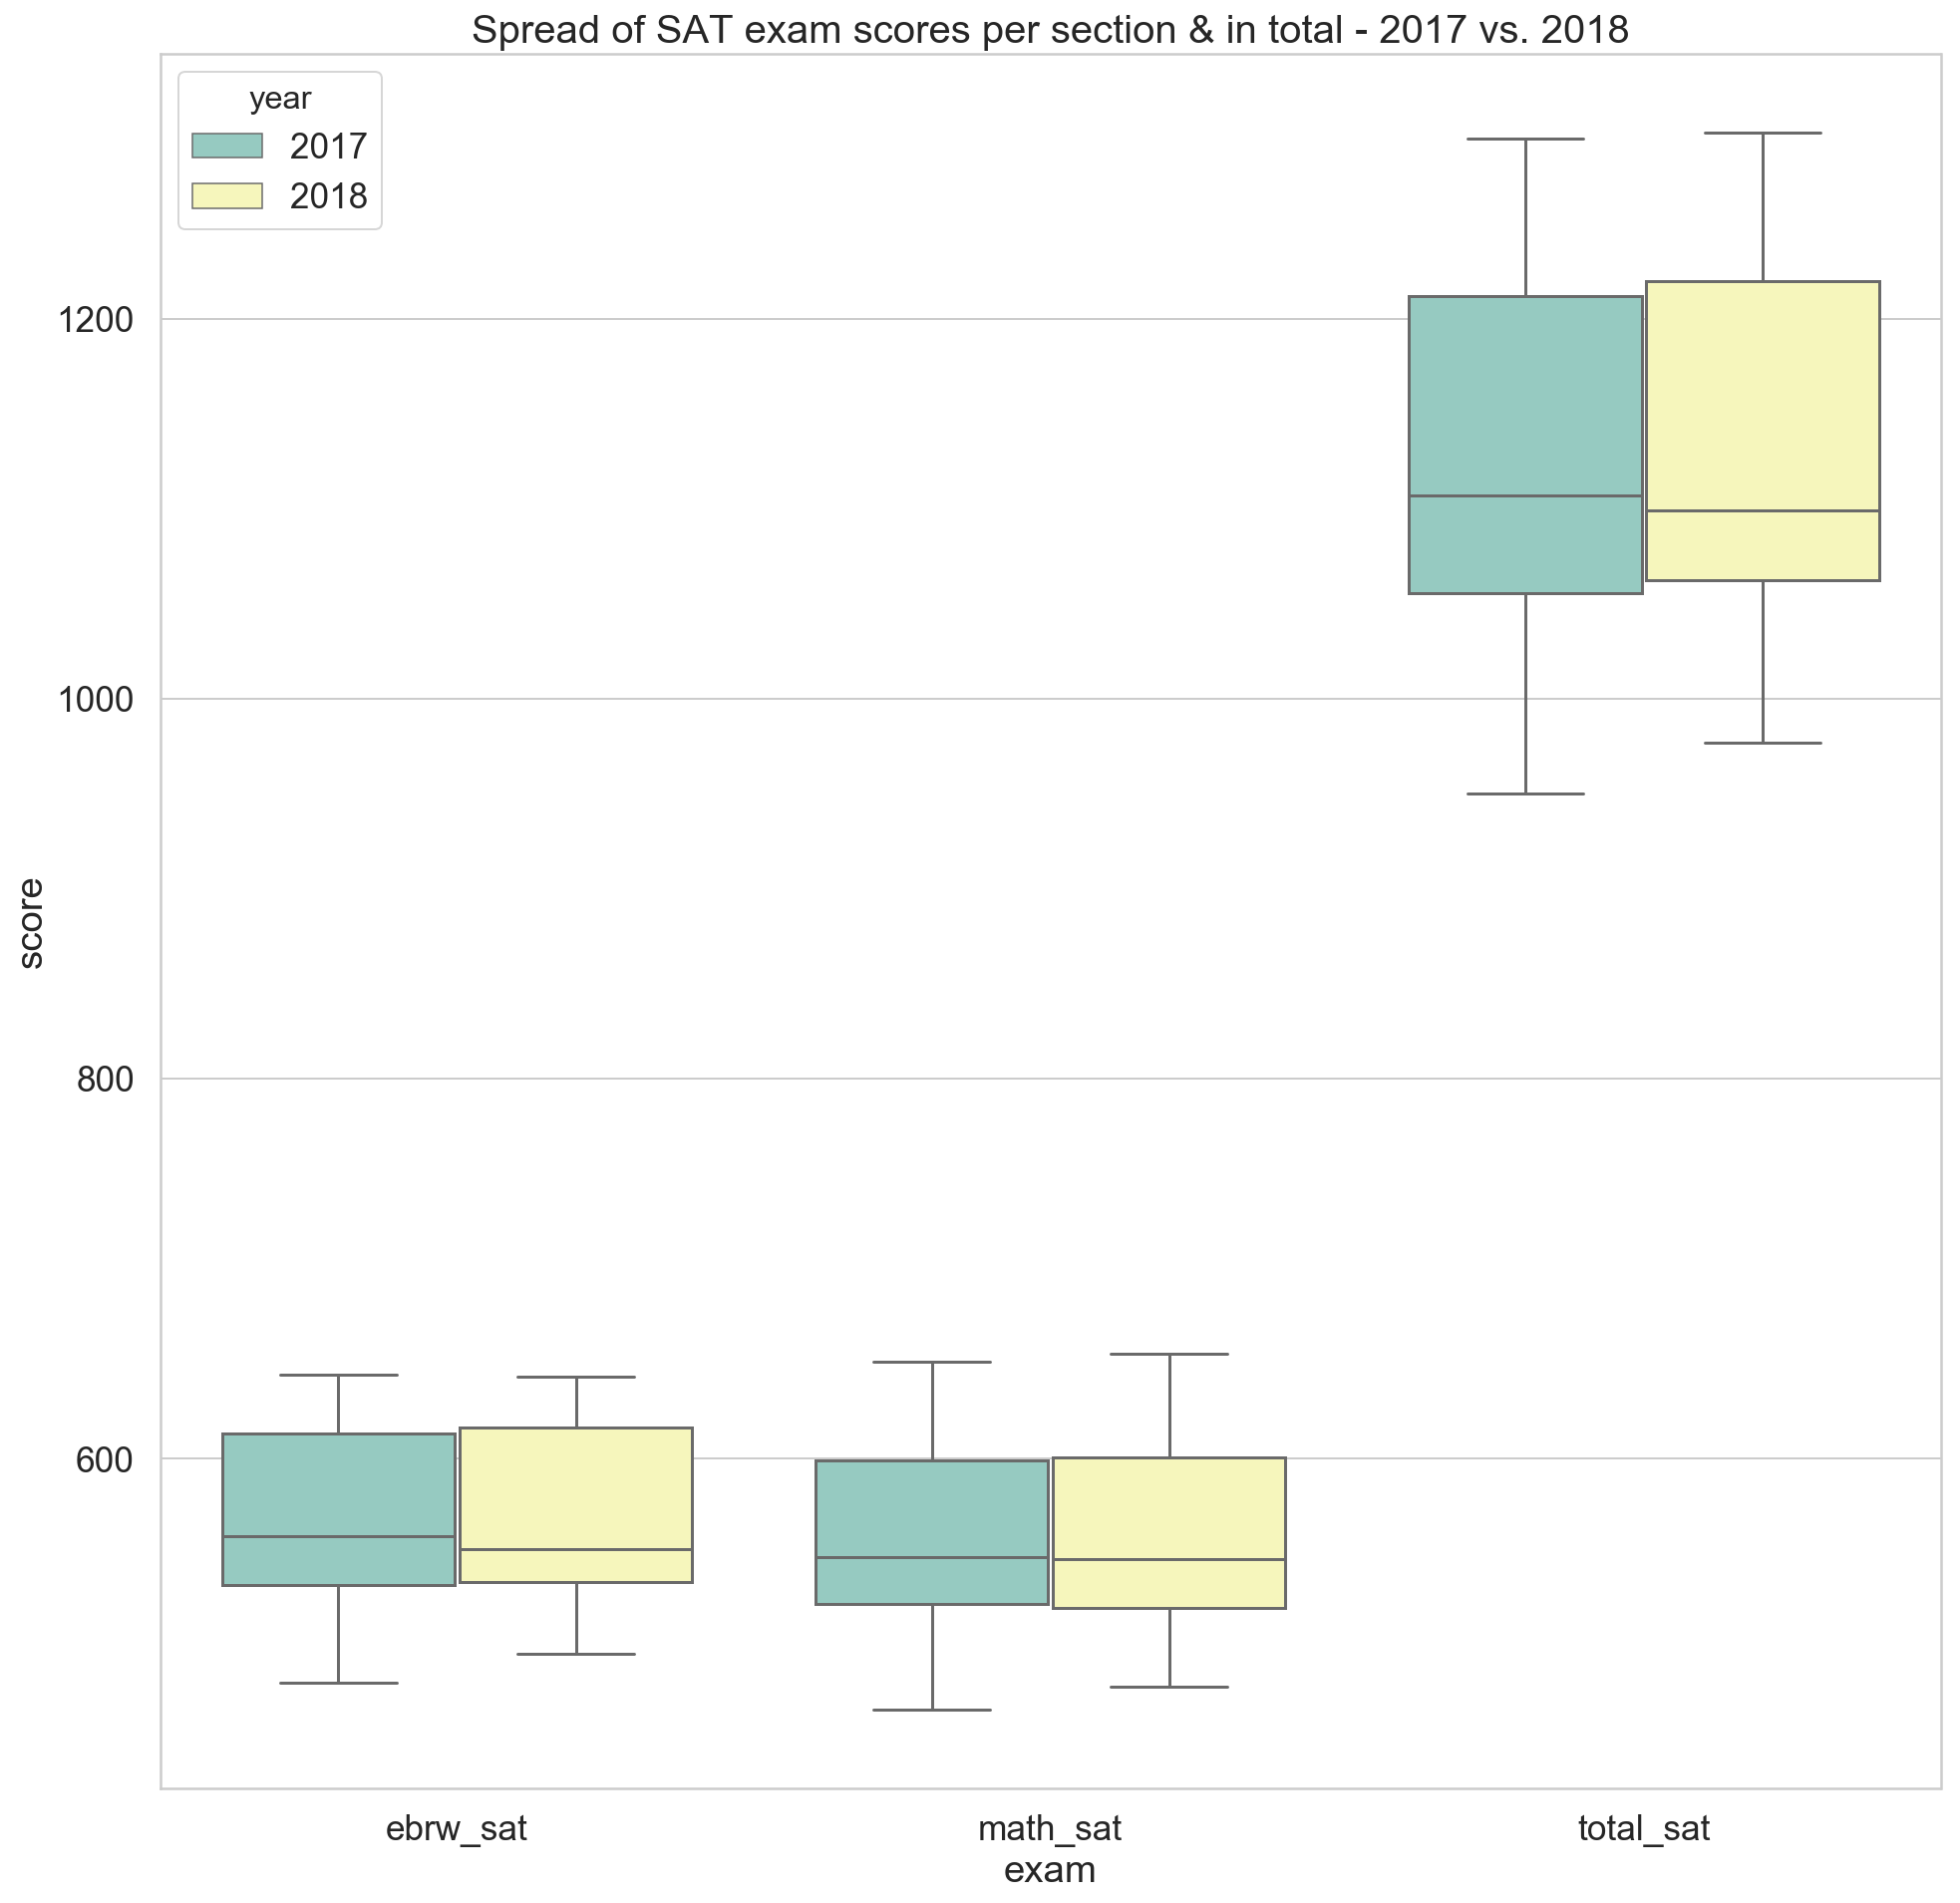

In [133]:
plt.figure(figsize=(16,16))

sns.boxplot(x='exam', y='score', hue='year',
            data=melted_df_sat[(melted_df_sat.exam != 'participation_sat')],
            palette='Set3');

plt.title('Spread of SAT exam scores per section & in total - 2017 vs. 2018', fontsize=20);

The median scores fell for all section and total score from 2017 to 2018. 

In [134]:
# finally, ill look at participation rates

melted_df_participation = melted_df[(melted_df.exam == 'participation_act') | (melted_df.exam == 'participation_sat')]

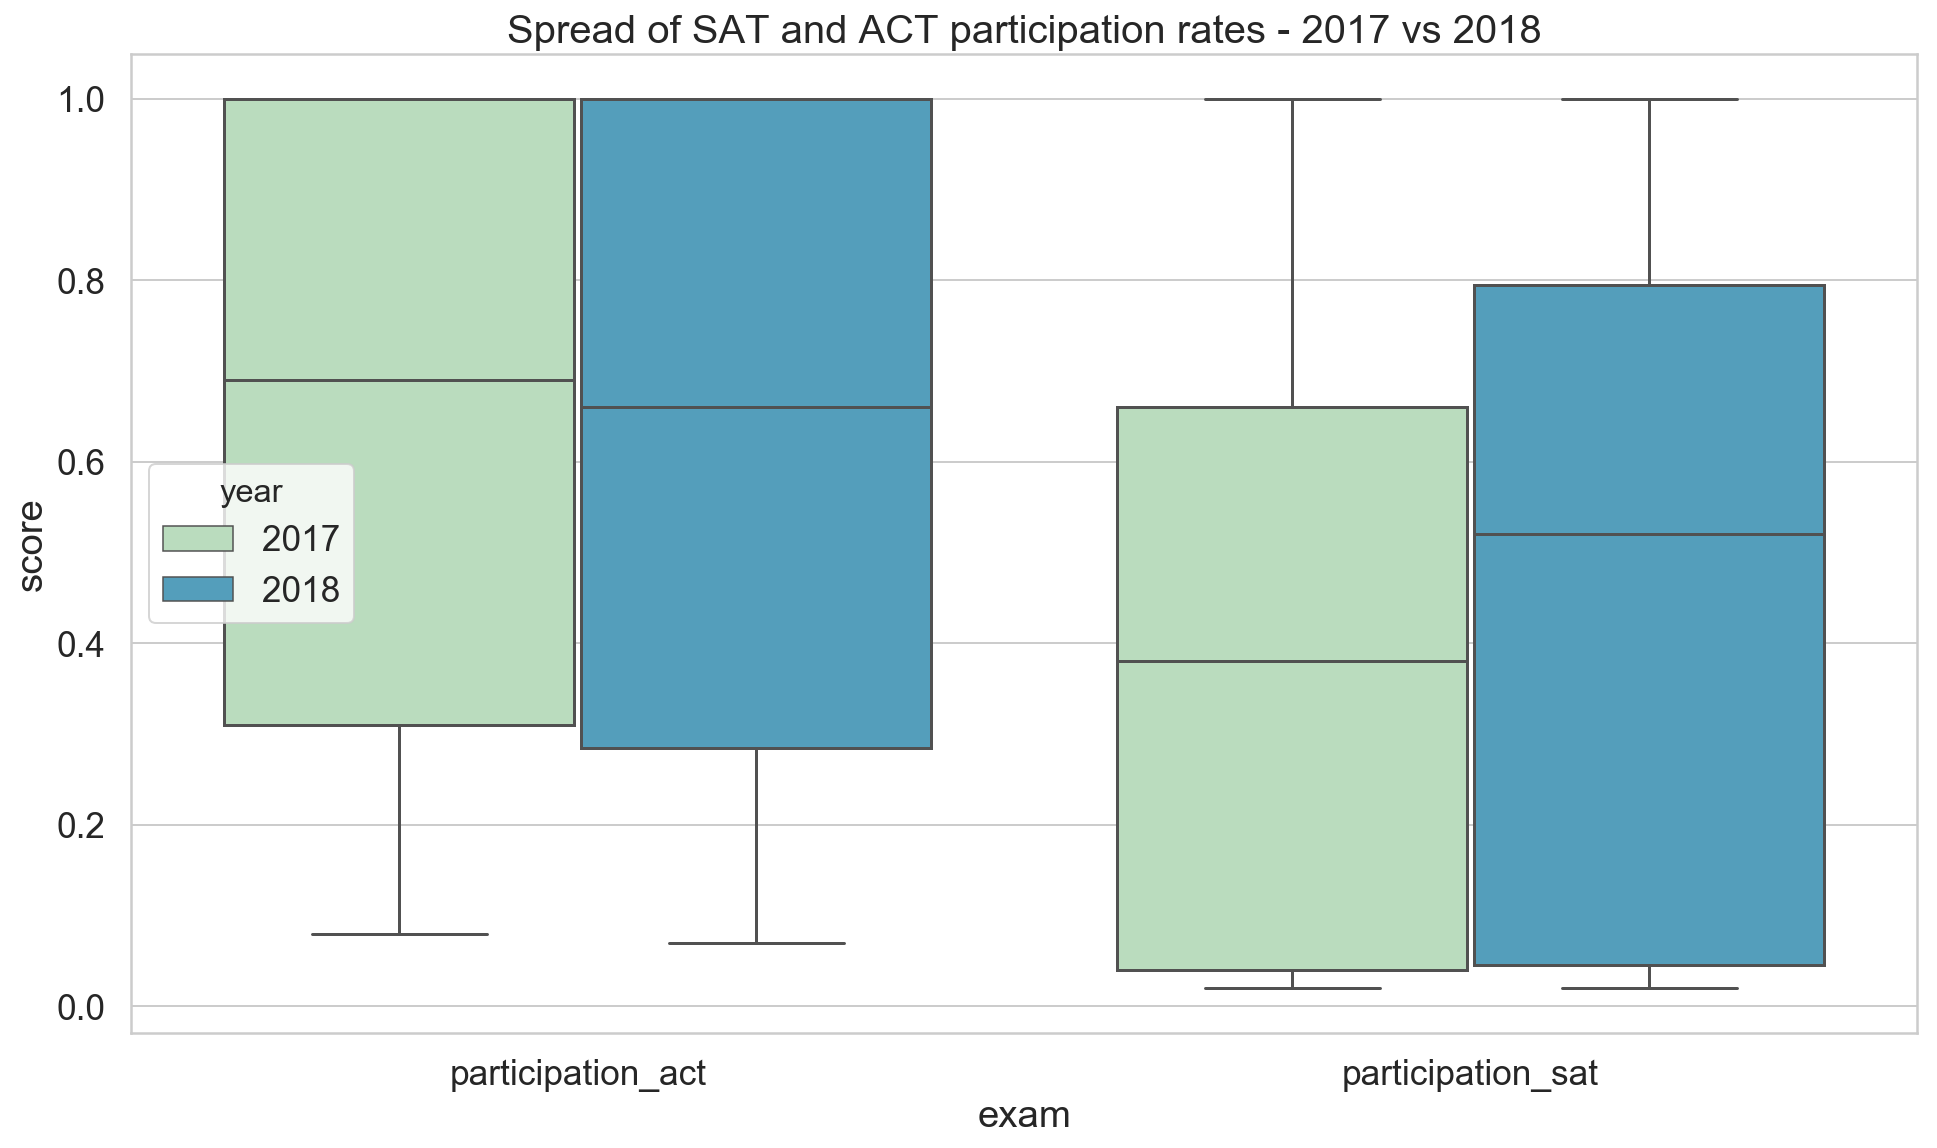

In [135]:
plt.figure(figsize=(16, 9))

sns.boxplot(x='exam', y='score', hue='year',
            data=melted_df_participation,
            palette='GnBu');

plt.title('Spread of SAT and ACT participation rates - 2017 vs 2018', fontsize=20);

Participation rates in the ACT tends to be higher than the participation in the SAT. However, the median participation rate in the ACT decreased from 2017 to 2018, whereas the median, Q1 and Q3 participation rates in the SAT all increased from 2017 to 2018. **Note that this does not mean the absolute number of participants in the ACT was higher than the SAT. It may very well be the reverse.**

### Choropleth maps 

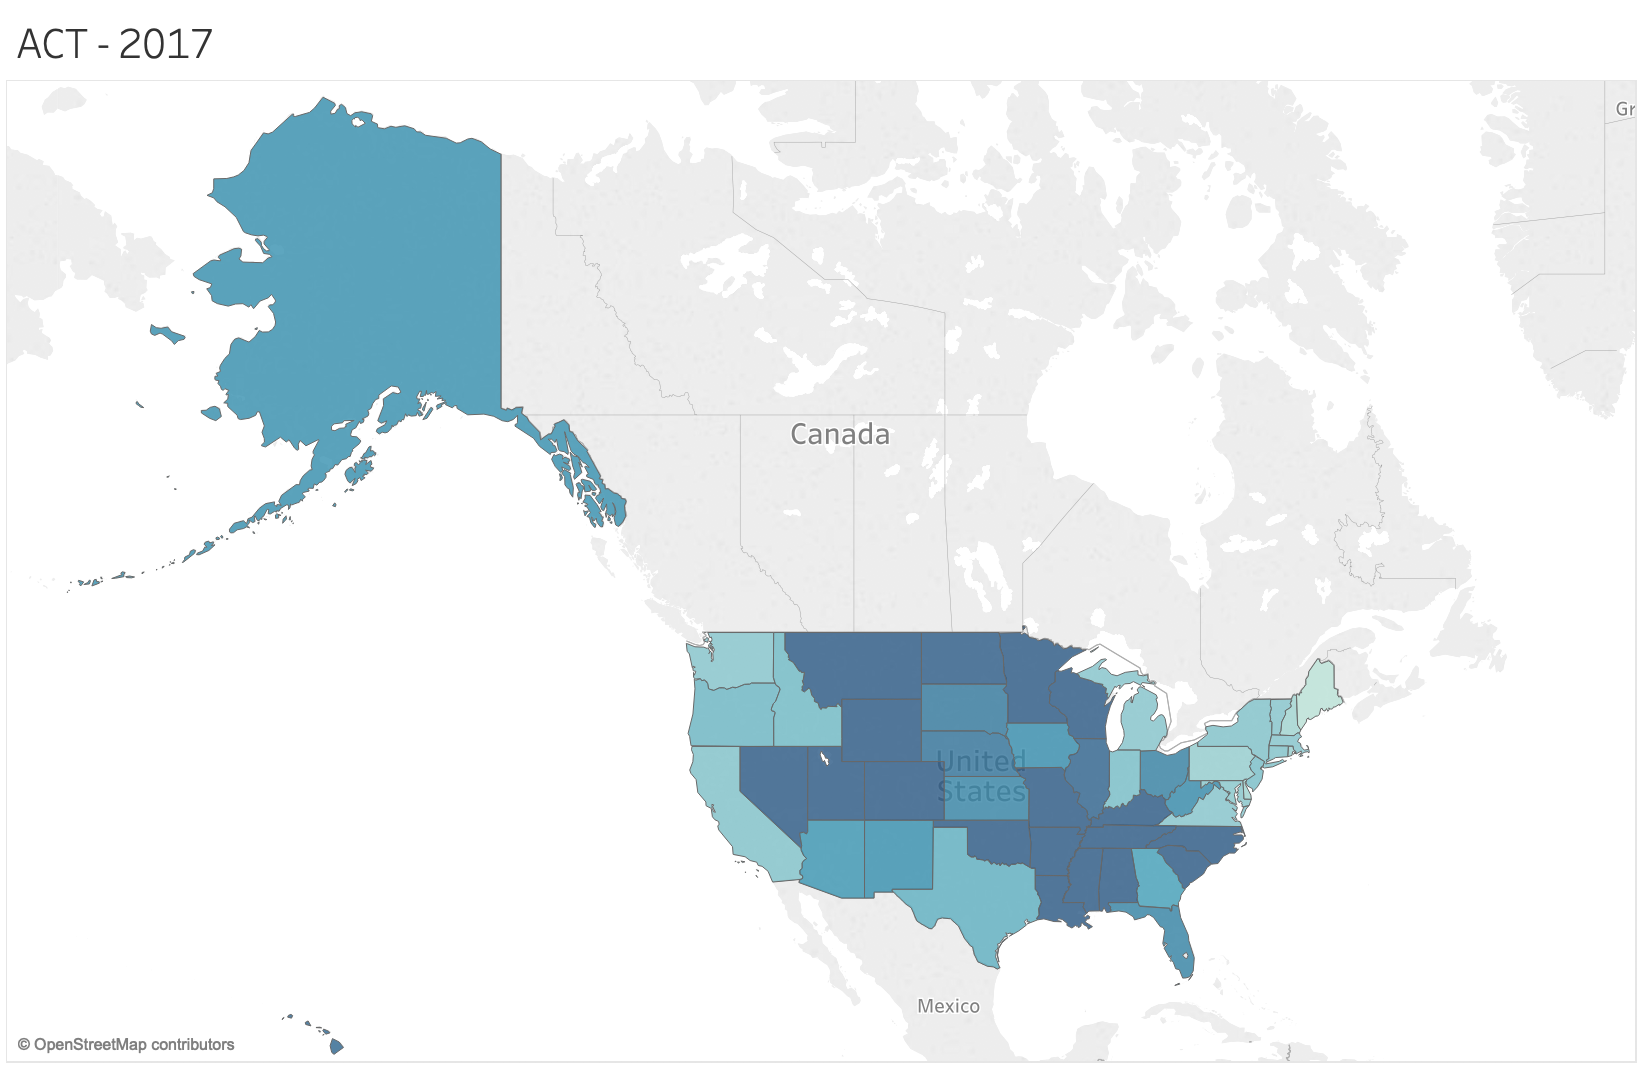

In [232]:
# Visualising participation in the two exams across the US

from IPython.display import Image

Image(filename= 'act_17.png')

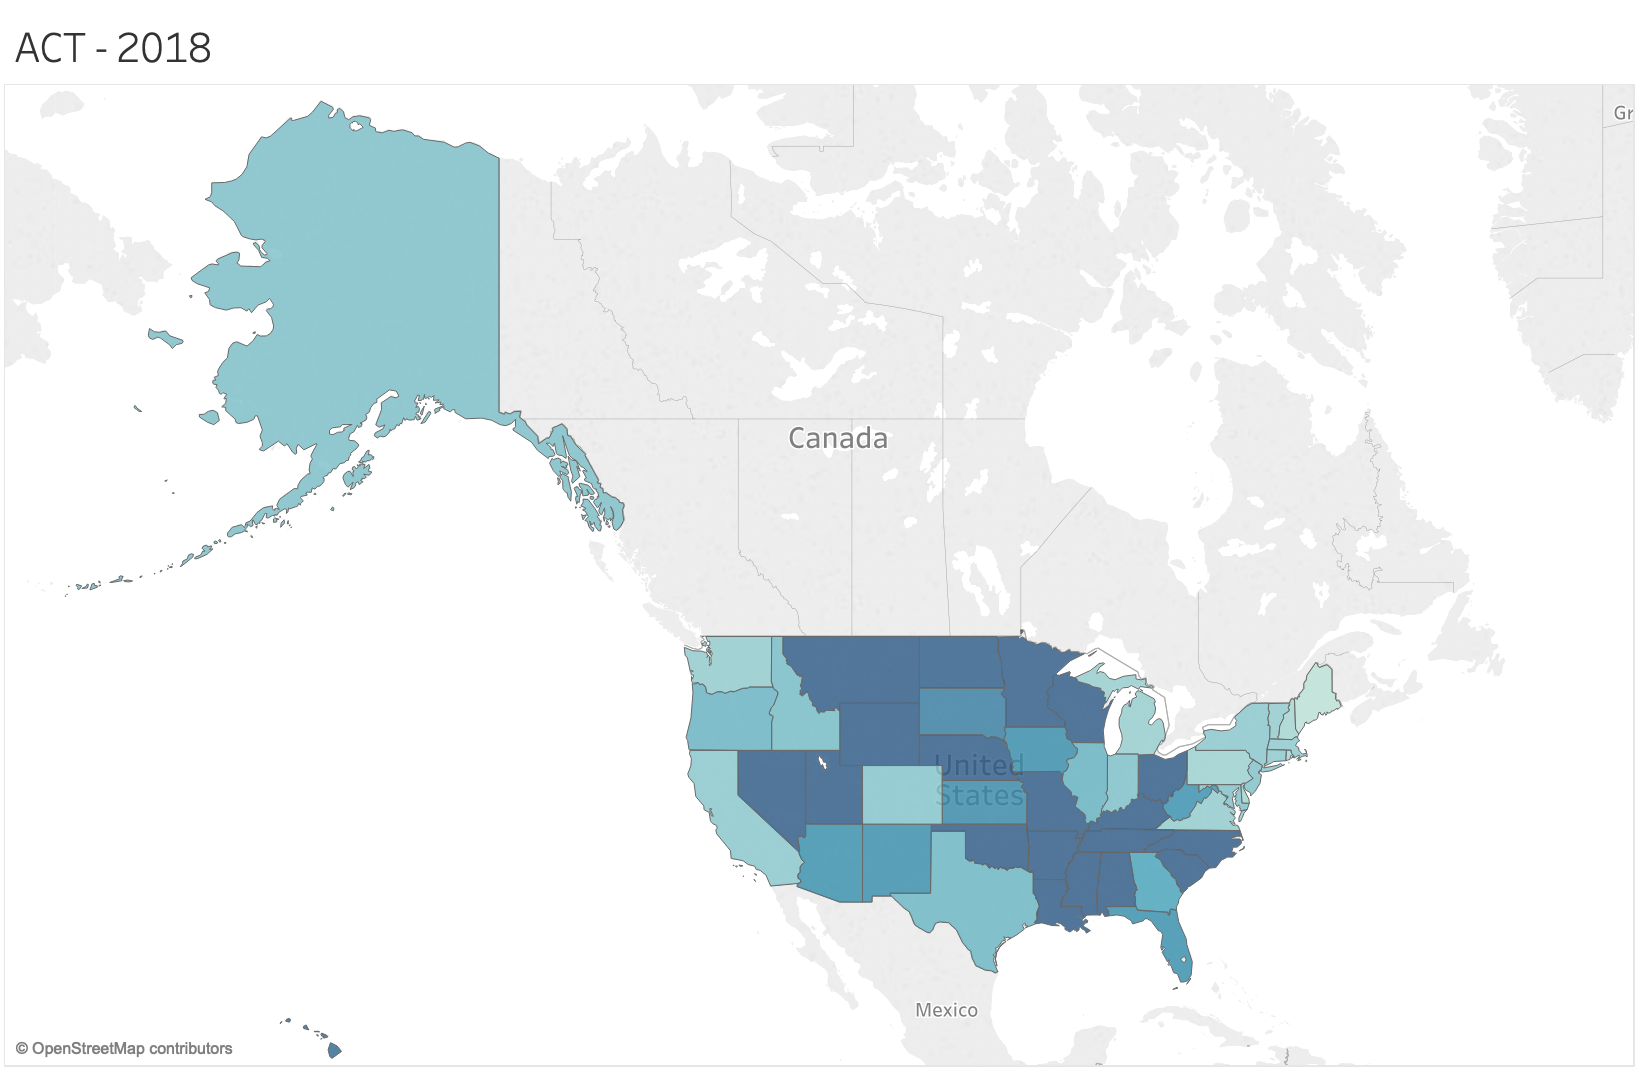

In [233]:
Image(filename= 'act_18.png')

Darker colors indicate higher participation rates. Mid-west and Mid-east region seems to favor the ACT over the SAT in general.

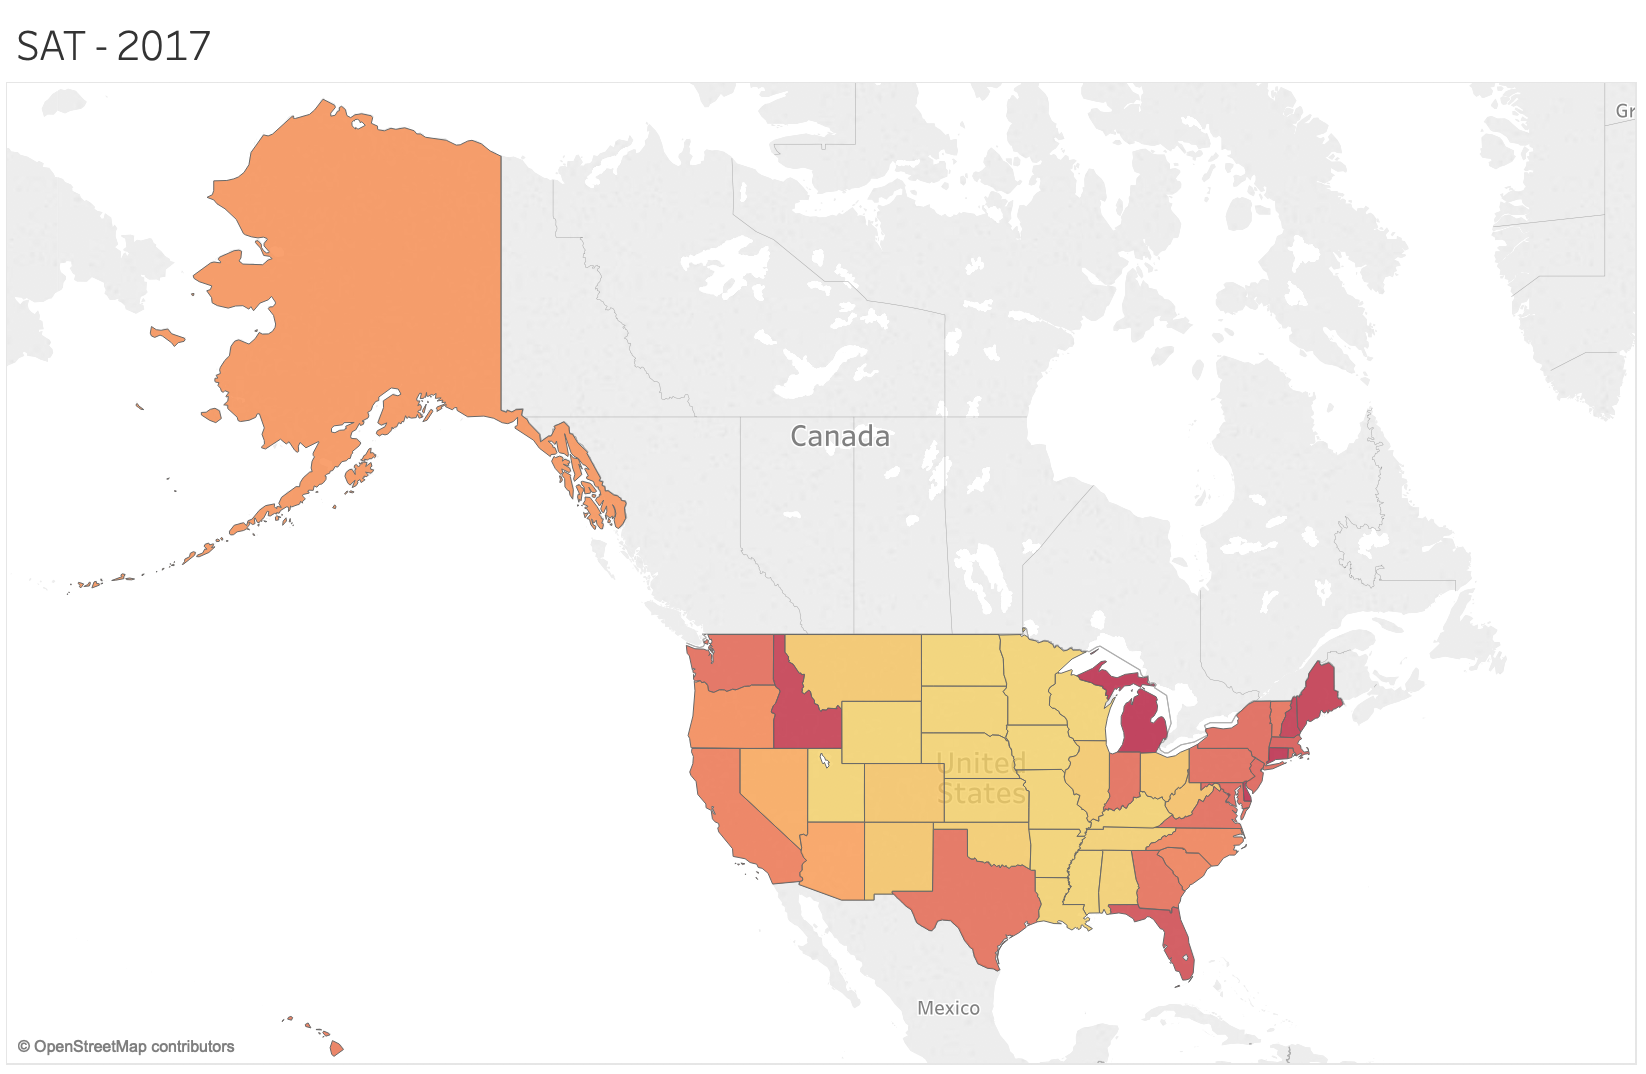

In [234]:
Image(filename= 'sat_17.png')

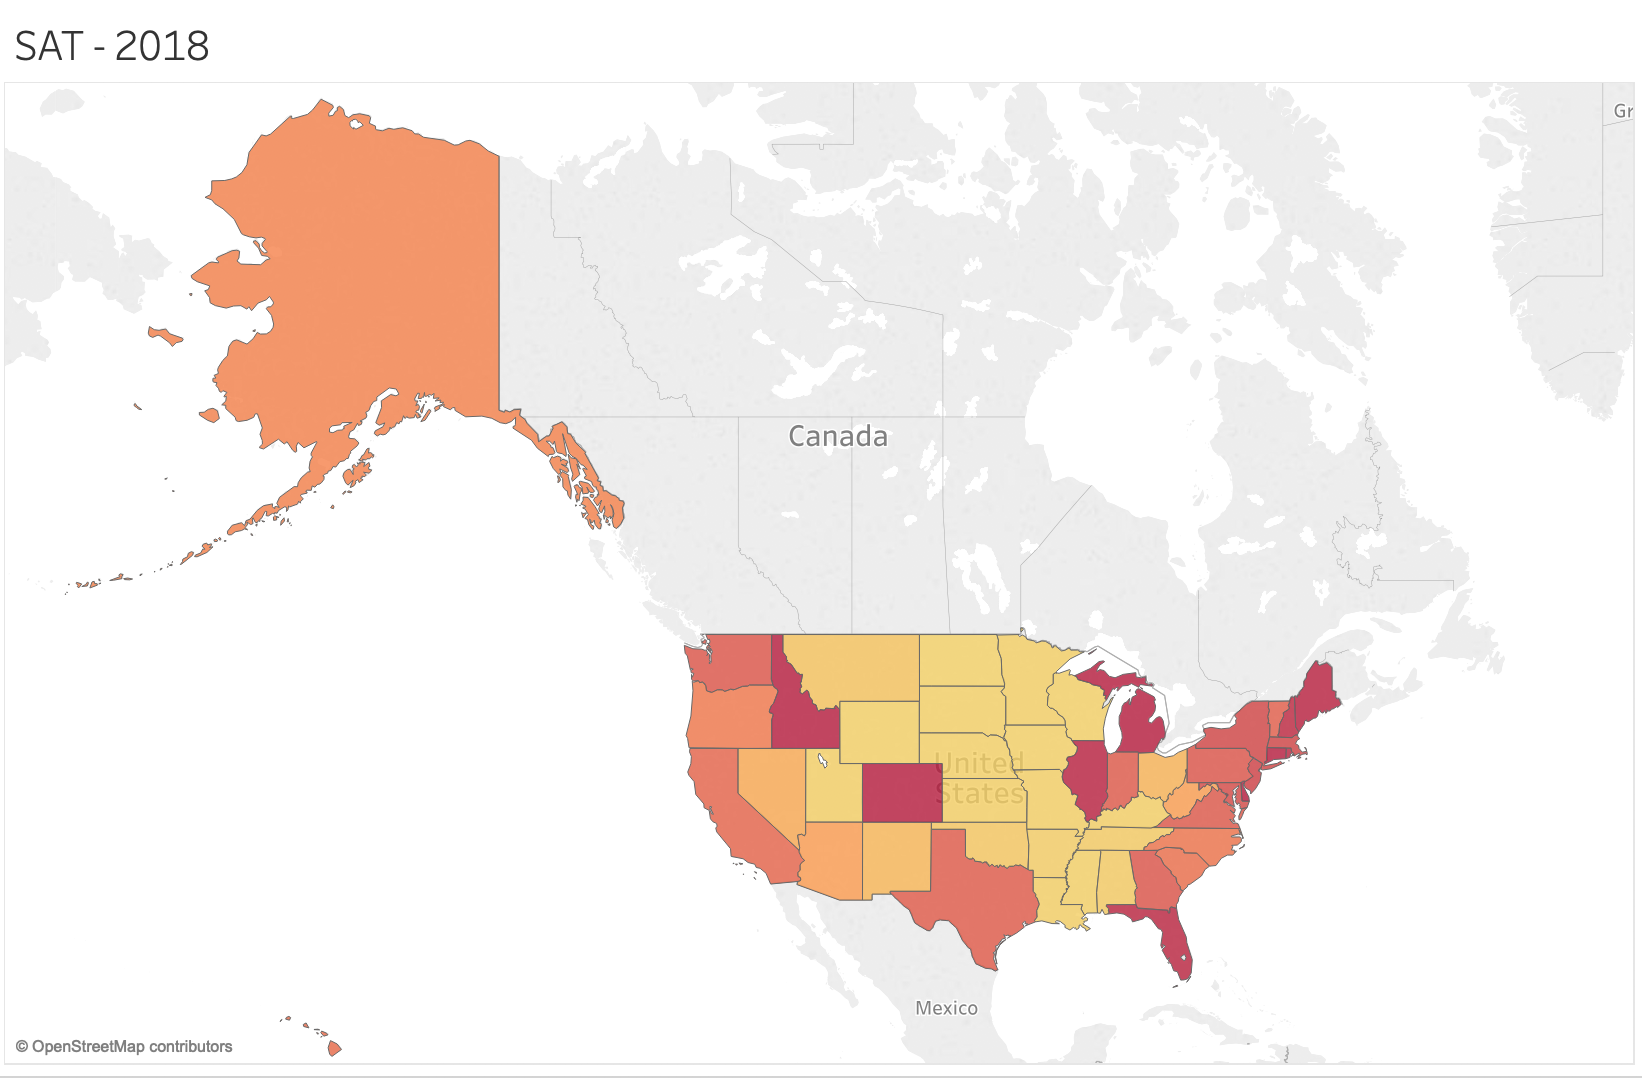

In [235]:
Image(filename= 'sat_18.png')

States in the east and the west coast seems to prefer the SAT over the ACT. 

## Descriptive and Inferential Statistics

#### Summarize Distributions

#### 2017 - ACT
**Available variables:** english_act, math_act, reading_act, science_act, participation_act, composite_act

The **english scores** in the 2017 ACT ranges from 16.3 to 25.5 with a standard deviation of 2.3. The mean score is 20.9 and the median is 20.7. The fact that the mean is greater than the median suggests that there is slight right skew in the data. I.e., most data points are lower than the mean.

The **math** scores in the 2017 ACT ranges from 18 to 25.3 with a standard deviation of 1.98. The mean score is 21.1 and the median score is 20.9. Since mean > median, the data is skewed to the right.

The **reading** section scores in the 2017 ACT ranges from 18.1 to 26 with a standard deviation of 2.06. The mean score is 22 and the median is 20.45. The data is skewed to the right. 

The **science** section scores in the 2017 ACT ranges from 2.3 to 24.9 with a standard deviation of 3.18. The mean score is 21 and the median is 21.3. Since the mean and the median are very close, the distribution resembles the symmetric distribution. The minimum score in this section is an outlier and doesn't describe the spread of the lower points in the dataset.

**Composite** scores ranged from 17.8 to 25.5, with a mean of 21.5 and a median of 21.4. The standard deviation was 2.02. Distribution of composite scores closely resembles a symmetric distribution. 

**Participation** in the ACT in 2017 ranged from 8% to 100%. Mean participation rate was 65% and the median participation rate was 69%. Unlike section scores, the distribution of participation is left skewed.

#### 2017 - SAT
**Available variables:** ebrw_sat, math_sat, total_sat, participation_sat

**EBRW** scores for the 2017 SAT ranged from 482 to 644 with a standard deviation of 45. The mean was 569 and the median was 559. The distribution is skewed to the right. 

**Math** scores ranged from 468 to 651, with a mean of 556 and a median of 548. Standard deviation was 47 points. Again, the distribution is skewed to the right.

**Total** SAT scores ranged from 950 to 1295 with a standard deviation of 92 points. The mean total SAT score was 1126, and the median SAT score was 1107. Again, the distribution is skewed to the right.

**Participation** in the SAT for 2017 ranged from 2% to 100%. The standard deviation, mean and median were 35%, 39% and 38% respectively. The data is very widely spread out.

#### 2018 - ACT
**Available variables:** composite_act, participation_act

**Composite** scores ranged from 21.4 to 25.6, with a mean of 21.47 and a median of 21.3. The standard deviation was 2.14. Distribution of composite scores approximates a symmetric distribution since the median and the mean are fairly close. 

**Participation** in the ACT in 2018 ranged from 7% to 100%. Mean participation rate was 62% and the median participation rate was 66%. The distribution of participation is left skewed.

#### 2018 - SAT
**Available variables:** ebrw_sat, math_sat, total_sat, participation_sat

**EBRW** scores for the 2018 SAT ranged from 497 to 643 with a standard deviation of 45. The mean was 567 and the median was 552. The distribution is skewed to the right. 

**Math** scores ranged from 480 to 655, with a mean of 557, a median of 547 and a standard deviation of 49. Again, the distribution is skewed to the right.

**Total** SAT scores ranged from 950 to 1295 with a standard deviation of 92 points. The mean total SAT score was 1126, and the median SAT score was 1107. Again, the distribution is skewed to the right.

**Participation** in the 2018 SAT ranged from 2% to 100%. The standard deviation, mean and median were 38%, 46% and 52% respectively. These numbers indicate that data is very widely spread out.

#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?

The central limit theorem states that if the size of our sample is big enough, the distribution of the sample means will be normally distributed. We don't observe this trend for any of our variables here because our dataset is really small. Our n here is two since we only have two years worth of data per state. If we were, for example, to look at mean exam scores in the last fifty years, the distributions we get would approximate the normal distribution.

#### Does it make sense to conduct statistical inference given these data specifically? 

Statistical inference allows us to derive information regarding the entire population from a random sample. It is relevant in cases when it is practically impossible to get data points from every individual member of a population. For example, a pharmaceutical company in Canada testing a new drug can not possibly make every single person in Canada take the drug in order to test the new drug' effectiveness. In the same vein, a newspaper covering the upcoming elections can not go and speak to every Canadian to ask who they plan on voting for. In such cases, statistical inference is used to make propositions about the general population using data drawn from a random sample. Here, it doesn't make sense to conduct statistical inference because we actually do have data from every single member of our population, states in USA. If we only had half the states, we could conduct statistical inference to approximate the distribution of SAT and ACT scores in the states that we didn't have in our dataset.

**Is it appropriate to compare specific SAT and ACT math scores?**

No. We've seen from the heatmaps above that participation rates in the SAT and the ACT are negatively correlated. States that have a high participation rate in the SAT will have a low participation rate in the ACT, and visa versa. We've also seen that participation rates are negatively correlated with scores. States with high participation rates in the SAT will have a low Math score, and visa versa. The intuition behind why was explained before. As such, states with a high SAT participation rate will have a low math section average and a low participation rate in ACT, and therefore a high Math average in the ACT. It would only be appropriate to compare SAT and ACT math scores in states that have similar participation rates in both exams. 

## Outside Research

*Choose three states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below.*

**State 1**: Illinois had a very big jump in it's SAT participation rate (9% to 99%) and a decrease in it's ACT participation rate (93% to 43%) from 2017 to 2018. What happened there to cause this change? 

It turns out that the ACT was the mandatory exam of choice in Illinois up to 2015, as per a 14 year contract with the ACT Board. Between 2015 and 2017 the state didn't have a mandatory exam, and it announced in June 2017 that it had selected the College Board as its official tester for high schoolers starting in 2018 for a period of at least 3 years.

Some think that economic considerations played a part in the state of Illinois' decision to switch to the SAT. According to Illinois News Network, College Board had bid 61.5 million dollars against the ACT's 54 million bid to procure the 3 year contract. [*1]

Though the state of Illinois did not make an official explanation regarding the decision, it is known that the state of Illinois reviewers, who evaluated the two exams, gave the ACT low grades on the categories of 'Grade 10 Standards Alignment' and 'Grade 11 College Exam Standards Alignment', on the basis that the ACT did not provide sufficient coverage of the state of Illinois' high school education content. The ACT did not agree with this assesment, however, and has filed an official protest over the selection process, proclaiming the decision was made because of the College Board's higher bid.

**State 2:** Colorado made the SAT mandatory in 2017 and jumped from a 11% participation rate for the exam in 2017 to 100% in 2018. What motivated this decision? 

Like Illinois, state of Colorado had been using ACT as it's mandatory university admissions exams since 2001 until the decision to switch, which surprised many education professionals in the state who had pressed for sticking with the ACT due the state's long standing history with that exam. They preferred the ACTs since it had been the norm for more than 15 years, and provided relevant authorities a common measurement over time. 

According to ChalkBeat, state officials stated that the selection committee, made up of educators, school administrators and subject matter experts from the states' various of urban, rural and suburban districts, chose the SAT in part because it aligns with Colorado's high school common core English and Math standards. The state repoted that the committee also found “the College Board’s reporting system more useful to students, as it connects students to resources and activities designed to help identify next steps for extra support or possible acceleration.” 

Jason Glass, superintendent of the Eagle County school district in Colorado, said another factor that may have swayed the decision was that "the SAT had a reputation for being more reason-based and focused on critical thinking, while the ACT has a reputation for being more of a fact-recall test." [*2]

**State 3:** Connecticut is a state that had 100% participation rate in the SATs for both 2017 and 2018, indicating that the exam is mandatory for all high schools in that state. Since when has this been the case, and why was that decision taken in the first place? 

The SAT has been mandatory in Connecticut since the 2015-2016 school year. The exam is administered without any cost to students. Before that, the state had it's own statewide exam that was a requirement for all high school students.

Since most high schoolers in Connecticut were already taking the SAT for their university applications on top of the state administed exam, parents and education professionals thought that the amount of exams students have to take in their junior year had become too much. Replacing the existing test with the SAT was meant to leave high school students with one less exam to stress over. [*3]

The state also thought switching to the SAT would help motivate more students to apply to university. Without it being mandatory, many low income students opt to not take the exam. 

## Conclusions and Recommendations

#### Key Takeaways

* Where students live in the U.S. is an important factor in which test they end up taking. It turns out that SAT is more popular with states in the East and West coast, while the ACT is more popular in the mid-West. A lot of states in these regions require high school students to take either one of the exams as part of their state wide high school curriculum. Since colleges across the U.S. accept scores from both exams, students whose state mandate a specific exam usually don't take the other one. That said, some very eager students do take both exams, likely to use the one that they score better in with their university applications. 


* It is tempting to try to compare such things as the quality of different states' high school education, or the difficulty level of the two exams based on the mean scores students achieve from these standardized tests. Such deductions are misleading as there is an inherent bias in the data. When participation rates are high in a state because the government instated an exam or it is norm to take a specific exam, all kinds of students are taking the test, from the most ambitious to the most slacker. On the contrary, when participation rates are low, it is only the most perfectionist students that take the exam, who tend to score higher than the average. To make accurate conclusions, the states whose scores are being compared need to have similar participation rates in the exam.


* A variety of factors play into the decision of states to make the SAT or the ACT mandatory. These can range from economic ones to educational/content-related, to practical. Cases of Illinois, Colorado and Connecticut provided an example for each of these factors. In Illinois, the state had an economic interest in selecting the exam provider that bid a higher amount to procure the contract. In Colorado, it was tought that the SAT aligned better with that states high school curriculum, and the resources College Board provided to students to study and improve their scores were deemed to be better than that of the ACT. Finally, in Connecticut, SAT was already the exam of choice by most students and so, it simply made more sense to pick SAT.

#### Final Reccommendations

- **Keep improving the SAT.** As shown by the example of Colorado, having an exam better aligned with the state high school curriculums and providing students with better resources for preperation can actually persuade states to opt for the SAT over the ACT. Seeing that participation rates in the SAT improved greatly from 2017 to 2018, it appears that the 2016 changes were well received and that the College Board is on the right track.


- **Focus marketing dollars in the West and East coast** as students in these states have the highest likelihood of choosing the SAT over the ACT. Since the decision to take which exam is largely a factor of where students live, trying to grab the extra market share in areas where SAT is more popular will have a higher possibility of yielding favorable outcomes at a lower cost than trying to establish SAT as an alternative in markets where the ACT dominates.


- **Try to win states where ACT is mandatory by going directly to the policy makers.** Spending marketing dollars in states where the ACT is mandatory will be a waste of money. Since universities accept both tests, most students only take either the SAT or the ACT, as shown by the high negative relationship between participation_act and participation_sat in our dataset. Instead, the College Board should take a top down approach and place its efforts directly with the policy makers. 

*Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state.*

I would reccomend College Board to focus on increasing participation rates in California for the following reasons:

- California is the U.S.'s most populous state with a total population of 40 million. Since the market size is simply bigger in California than any other state, College Board can get the most buck out marketing dollars spent there. 


- California is the West coast, a region where SAT is the market leader of university admissions exams. Since taking the SAT is much more the norm in this region, it is easier to market.


- Though the SAT is already the more popular exam in California, the participation rate for it was 60% in 2018. This is a high market share but is still far from 100%, which means there is still a lot of room for growth. Furthermore, the fact that the participation rate in the SATs increased by 7 percentage points from 2017 to 2018 is a good indicator that there is a lot of growth potential in California.

How can the College Board increase participation rates in the SAT in California?

- Try to partner with the state of California to make the SAT mandatory for all students 


- Raise awareness of the benefits of taking the SAT in increasing acceptance odds to universities


- Promote the new SAT app and the partnership with Khan Academy, which has made studying for the exam more affordable [*4]

#### Future Considerations

In recent years, some colleges have begun to drop requirements for prospective students to submit ACT/SAT scores. Princeton, Stanford and NYU are amongst the universities that have elimited this mandate. 

With prep programs charging students thousands of dollars, the primary concern of these universities is that achieving a high score on these exams has become more a function of family income than hard work or intelligence. 

With this in mind, College Board should continue to work to make the SAT a more fair and accessible test by expanding its free preparatory resources and developing technologies like the SAT app that provide students from all income groups the ability to prep and improve their scores.

## Sources
- **[ 1 ]** Lauterbach, Cole. ["College exam company raises questions about with Illinois ACT/SAT switch"](https://www.ilnews.org/news/schools/college-exam-company-raises-questions-about-with-illinois-act-sat/article_c4a805ca-8b93-11e8-b9d4-f7ab2c28ae00.html)". *Illinois News Network*. July 22, 2018. 


- **[ 2 ]** Gorski, Eric. ["Goodbye ACT, hello SAT: a significant change for Colorado high schoolers"](https://www.chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/). *Chalkbeat: Education News For America.* December 23, 2015. 


- **[ 3 ]** Harris, Elizabeth. ["Connecticut to Require All 11th Graders to Take the SAT."](https://www.nytimes.com/2015/08/07/nyregion/connecticut-to-require-all-11th-graders-to-take-the-sat.html) *The New York Times*. August 6, 2015.


- **[ 4 ]** Zinshteyn, Mikhail. ["Will the new SAT Better Serve Poor Students?"](https://www.theatlantic.com/education/archive/2016/03/will-the-new-sat-better-serve-poor-students/472311/) *The Atlantic*. March 5, 2016.